

# Model predykcji czy dany atak/incydent terrorystyczny spowoduje ofiary śmiertelne

## Wojciech Ogórek (DS Bootcamp ING,  Katowice, gr.3)




### Plan projektu:

0. Wstęp
1. Wczytanie danych
2. Wstępna analiza (EDA)
3. Czyszczenie danych
4. Inżynieria cech (Feature Engineering)
5. Wybór algorytmu i trenowanie modeli
6. Wyniki i wnioski

---

## 0. Wstęp

Projekt ma na celu stworznie modelu, dokonującego predykcji czy dany atak/incydent terrorystyczny spowoduje ofiary śmiertelne

Wykorzystane dane: Global Terrorism Database (GTD) - https://www.start.umd.edu/gtd/

GTD to baza (udostępniana jako open-source) ponad 180.000 indydentów i ataków terrorystycznych, które miały miejsc między 1970 a 2017r. Zawiera dane dotyczące zarówno ataków międzynarodowych jak i związanych z terroryzmem "lokalnym" (np. różnego typu grupy ekstermistyczne, ataki motywowane finansowo itd...)

Do projektu wykorystałem wyłącznie wycinek bazy obejmujący lata 2014-1027 (strona udostępnia kilka plików z danymi z różnych okresów - badany dotyczy incydentów najnowszych). Ograniczenie wynika z możliwości sprzętu na którym wykonuję projekt. Przetworzenie data setu zawierającego 180 tysięcy rekordów było by bardzo czasochłonne. Ograniczenie się do lat 2014-2017 zredukowało rozmiar bazy do ok 56 tysięcy rekordów


---

## 1. Data Collection

Baza może być ściągnięta jako całość lub pod postacią 4 plików z różnych okresów czasowych.

| Zakres dat     	| Wielkość 	| Nazwa pliku                     	|
|----------------	|----------	|---------------------------------	|
| Cała baza      	| 89MB     	| globalterrorismdb_0718dist.xlsx 	|
| Lata 2014-2017 	| 30MB     	| gtd_14to17_0718dist.xlsx        	|
| Lata 1996-2013 	| 37MB     	| gtd_96to13_0718dist.xlsx        	|
| Lata 1970-1995 	| 21MB     	| gtd_70to95_0718dist.xlsx        	|
    
Dodatkowo bardzo ważnym plikim jest opis danych: **Codebook.pdf**
    
Pliki xlsx po ściągnięciu zostały (z poziomu programu MS Excel) przekonwertowane do formatu txt z warościami oddzielonymi tabulacją. Tego typu pliki mogły zostać zaczytane jako dataframe.

Ponieważ pliki są dość duże + pracowaliśmy wyłącznie na danych z lat 2014-2017 więc w katalogu projektowym znajduje się wyłącznie plik: *"gtd_14to17_0718dist.txt"* oraz *codebook.pdf*

In [1]:
# wyłączamy ostrzeżenia 
import warnings;
warnings.filterwarnings('ignore');

In [2]:
# importujemy podstawowe biblioteki

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
#wczytujemy dane do DataFrame o nazwie: terror

do_wczytania = "data/gtd_14to17_0718dist.txt"
terror = pd.read_csv(do_wczytania, sep="\t", encoding='latin1')

---

## 2. Wstępna analiza (EDA)

Podczas tego etapu sprawdzimy następujące rzeczy:
   
    2.1 Ile mam danych (incydentów terrorystycznych) i ile atrybutów ma każdy z nich 
    2.2 Co jest w dokumentacji dołączonej do zestawu danych
    2.3 Szybki rzut oka na przykładowe rekordy
    2.4 Jakiego rodzaju (Liczbowe, tekst, kategoryczne itd...) są moje dane
    2.5 Czym jest mój target (zmienna opisywana)
    2.6 Wykonamy kilka wizualizacji aby lepiej poznać dane
    2.7 Podsumowanie fazy EDA

### 2.1 Ile mam danych (incydentów terrorystycznych) i ile atrybutów ma każdy z nich

In [4]:
print(f'Wielkość zestawu danych (ilośc incydentów/ataków terrorystycznych): {terror.shape[0]}')
print(f'Ilość atrybutów opisujących każdy rekord (każdy atak): {terror.shape[1]}')

Wielkość zestawu danych (ilośc incydentów/ataków terrorystycznych): 56355
Ilość atrybutów opisujących każdy rekord (każdy atak): 135


Pojedynczy rekord ma bardzo dużą (relatywnie - patrząc na hardware jaki mam do dyspozycji) liczbę atrybutów + danych jest dość sporo. 

### 2.2 Co jest w dokumentacji dołączonej do zestawu danych

Dokładny opis razem z wyjaśnieniem wielkości "zakodowanych" (dotyczących np: rodzaju ataku, czy kod państwa gdzie atak nastąpił) znajduje się w pliku Codebook.pdf (przygotowanym przez twórców bazy).

Przetłumaczony i bardzo skrótowy opis znaczenia poszczególnych kolumn (z przygotowanego przeze mnie pliku "lista kolumn.txt"):

In [5]:
pd.options.display.max_rows=200
pd.set_option('display.max_colwidth', 350)
opis_danych = pd.read_csv("lista kolumn.txt", sep="\t", encoding='cp1250')
opis_danych[['Atrybut','Opis']]

,Atrybut,Opis
0,eventid,ID incydentu
1,iyear,Rok w którym incydent wystąpił
2,imonth,Miesiąc w którym incydent wystąpił
3,iday,Dzień w miesiącu w którym incydent wystąpił
4,approxdate,Przybliżenie jeżeli data nie jest dokładnie znana
5,extended,Czy incydent trwał dłużej niż 24h
6,resolution,Jeżeli incydent dłuższy niż 24h (extended = 1) to data zakończenia
7,country,Kraj wystąpienia incydentu
8,country_txt,Kraj wystąpienia incydentu
9,region,Region (kontynent) wystąpienia incydentu


Analizując plik "Cookbook.pdf" można wywnioskować następujące informacje o poszczególnych kolumnach z zestawu danych:

* Część kolumn wprost się dubluje - w jednej występuje wartość tekstowa, a w drugiej kod liczbowy jej odpowiadający. (np: *country* i *country_txt* , *region* i *region_txt*)
* Wiele kolumn mimo iż ma wartości liczbowe to są to dane kategoryczne (*country, region, attacktype1, targtype1* itd...)
* Potencjalnie część danych kategorycznych może przyjmować bardzo wiele (1000+) kategorii (np: *city, gname*) 
* Dla części danych "binarnych" (np: *compclaim*) określono 3 lub 4 wartości (1=TAK, 0=NIE, -9="nieznana", None="nie adekwatna") 
* Dla części danych liczbowych (np: *nperps*) wartość -99 lub -9 często oznacza: "nieznana"
* Część kolumn jest "zwielokrotniona" do obsłużenia specjalnych sytuacji (np: weaptype1-4 do użycia gdy w ataku wykorzystano wiele rodzajów broni , lub gname1-3 gdy atak przeprowadziło kilka grup terrorystycznych)

### 2.3 Rzut oka na przykładowe rekordy

In [6]:
pd.set_option('display.max_columns', 200)
terror.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,201401010001,2014,1,1,NaN,0,NaN,45,Colombia,3,South America,Norte de Santander,Convencion,"8,86879","-73,194094",1,0,Incident occurred in Campo Alegre area,"01/01/2014: Assailants detonated an explosive device at an oil holding pool along the Cano Limon - Covenas pipeline in Convencion municipality, North Santander department, Colombia. As a result of the blast, the pool was damaged and local residents evacuated the area. This was one of four holding pools attacked in the area on this day. No group...",1,1,1,0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,108.0,Oil,Cano Limon-Covenas Oil Pipeline,Crude Oil Holding Pools,45.0,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Liberation Army of Colombia (ELN),NaN,NaN,NaN,NaN,NaN,"The specific motive is unknown; however, sources noted that the National Liberation Army of Colombia (ELN) had declared war against multinational oil companies in Colombia in November.",0,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99,A crude holding pool was damaged in this attack.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""ELN bomb Colombia oil pipeline infrastructure,"" Colombia Reports, January 2, 2014.","""Colombia Guerrilla Update: ELN Blows Up Crude Oil Pools in Convencion (Norte de Santander),"" OSC Summary, January 2, 2014.",NaN,START Primary Collection,0,0,0,0,"201401010001, 201401010055, 201401010056, 201401010057"
1,201401010002,2014,1,1,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Banaadir,Mogadishu,"2,059819","45,326115",1,0,NaN,"01/01/2014: A suicide bomber detonated an explosives-laden vehicle at the Jazeera Hotel in Mogadishu city, Banaadir region, Somalia. At least four people, including civilians and assailants, were killed in the blast. This was one of three bombings at the hotel on this day; this first attack was meant to draw first responders to the scene. At le...",1,1,1,0,NaN,NaN,1.0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,8.0,Hotel/Resort,Jazeera Palace Hotel,Hotel,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,2,0,1,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,15.0,Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,2.0,20.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99,A hotel was damaged in this attack.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Co możemy wywnioskować:

* Wymieszane dane liczbowe i tekstowe 
* Dane tekstowe to zarówno krótkie nazwy (np: miast, krajów) jak i fragmenty tekstu (np: cytaty z gazet, opisy itd...)
* Można się spodziewać dość wielu wielkości NaN (niektóre kolumny mogą być prawie całe NaN-ami)

### 2.4 Jakiego rodzaju (Liczbowe, tekst, kategoryczne itd...) są dane

In [7]:
terror.dtypes.value_counts()

object     61
float64    45
int64      29
dtype: int64

Dane są 3 typów: int, float64 i object
Object to najprawdopodobniej zarówno dane tekstowe jak i kolumny z "mixed types"

Jeżeli chodzi o dane kategoryczne - to jest ich duża grupa (wiemy to z dokumentacji - "Codebook.pdf"), w wielu przypadkach dane te są reporezentowane jako wartość liczbowa (int).

Sprawdzenie ile unikalnch wartości jest w każdej z kolumn:

In [8]:
def sprawdz_unikaty(ramka_danych):
    columns = list(ramka_danych)
    for column in columns:
        print(f' {column}\t\tUnikalnych wartosci:{len(pd.unique(terror[column]))}')
    return None

In [9]:
sprawdz_unikaty(terror)

 eventid		Unikalnych wartosci:56355
 iyear		Unikalnych wartosci:4
 imonth		Unikalnych wartosci:12
 iday		Unikalnych wartosci:31
 approxdate		Unikalnych wartosci:1580
 extended		Unikalnych wartosci:2
 resolution		Unikalnych wartosci:1
 country		Unikalnych wartosci:137
 country_txt		Unikalnych wartosci:137
 region		Unikalnych wartosci:12
 region_txt		Unikalnych wartosci:12
 provstate		Unikalnych wartosci:1141
 city		Unikalnych wartosci:16091
 latitude		Unikalnych wartosci:24268
 longitude		Unikalnych wartosci:24061
 specificity		Unikalnych wartosci:5
 vicinity		Unikalnych wartosci:2
 location		Unikalnych wartosci:17285
 summary		Unikalnych wartosci:54079
 crit1		Unikalnych wartosci:2
 crit2		Unikalnych wartosci:2
 crit3		Unikalnych wartosci:2
 doubtterr		Unikalnych wartosci:2
 alternative		Unikalnych wartosci:6
 alternative_txt		Unikalnych wartosci:6
 multiple		Unikalnych wartosci:3
 success		Unikalnych wartosci:2
 suicide		Unikalnych wartosci:2
 attacktype1		Unikalnych wartosci:9
 attac

Widać kilka (kilkanaście) kolumn w których z opisu wynika że są kategoryczne a maja wiele (100+ lub nawet 1000+) kategorii.
Przykłady:

| Nazwa        	| Opis                    	| Unikalnych Wartosci 	|
|--------------	|-------------------------	|---------------------	|
| city         	| miasto                  	| 16091               	|
| target1      	| cel ataku               	| 15100               	|
| gname        	| grupa terrorystyczna    	| 745                 	|
| targsubtype1 	| podkategoria celu ataku 	| 110                 	|

Na chwilę obecna nie zmieniamy nic w tych danych - to zostawiamy na późniejszą fazę

### 2.5 Czym jest mój target (zmienna opisywana)

Celem jest predykcja czy danych incydent terrorystyczny będzie miał ofiary śmiertelne.
Tego typu informacja (ilość ofiar) znajduje się w kolumnie: **nkill**

In [10]:
terror['nkill'].dtypes

dtype('float64')

**nkill** to zmienna typu float64 a rozkład jej wartości jest następujący:

0.0     24887
1.0     11878
2.0      5236
3.0      2742
4.0      1690
5.0      1143
6.0       866
7.0       680
8.0       500
10.0      392
9.0       333
11.0      280
12.0      244
13.0      225
15.0      179
14.0      164
16.0      142
20.0      131
17.0      114
18.0       95
Name: nkill, dtype: int64


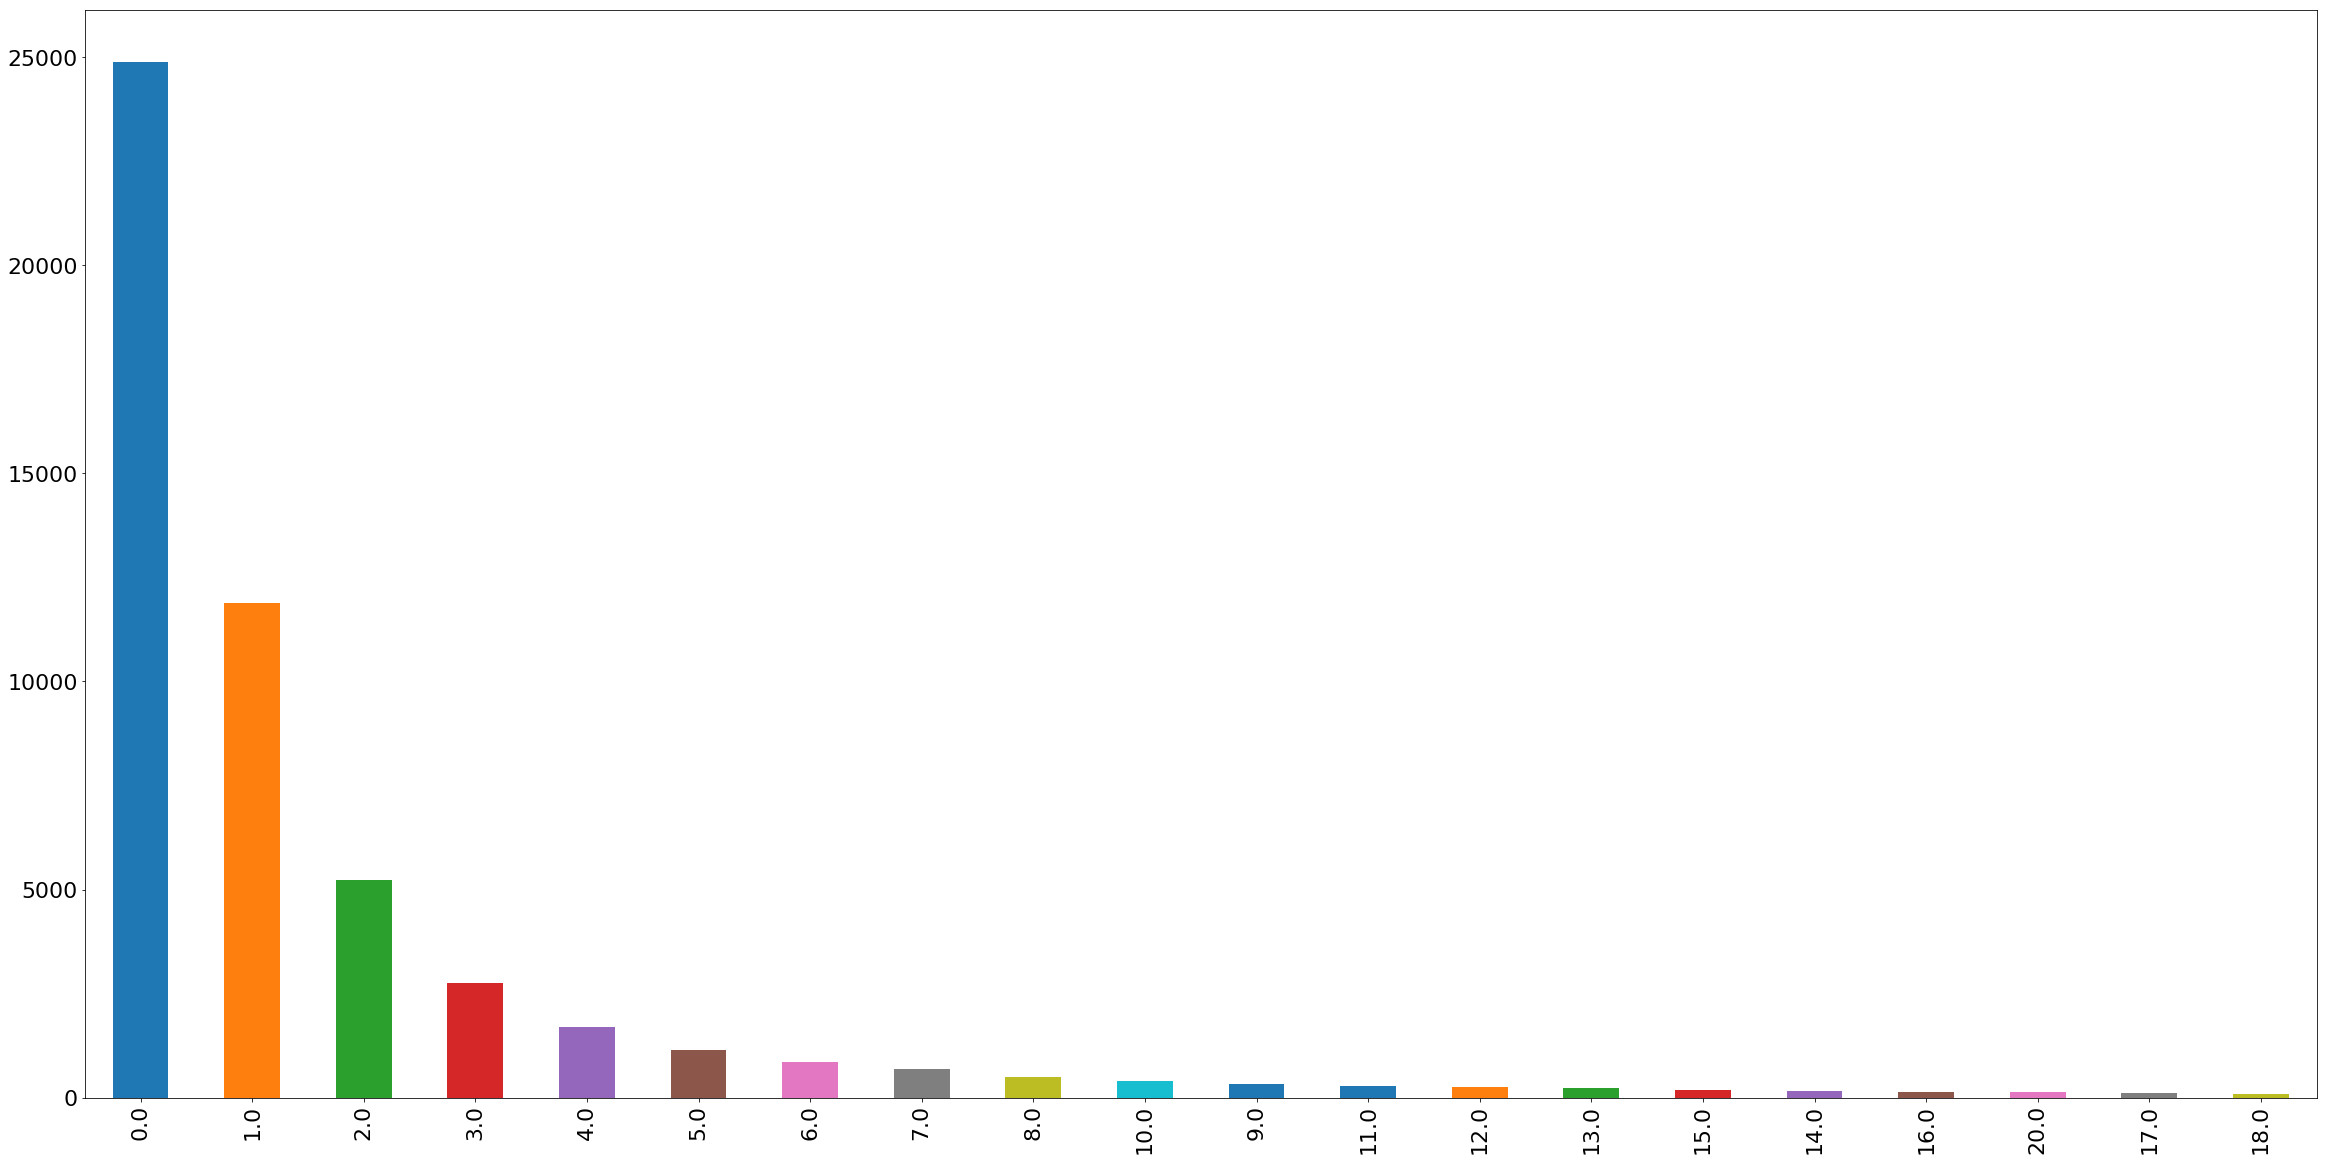

In [11]:
zabici = terror['nkill'].value_counts()
print(zabici.head(20))
plt.rcParams.update({'font.size': 22})
zabici.head(20).plot(kind="bar", figsize=(40,20))

Mimo iż typ zmiennych to float to dane są wyłącznie całkowite (co ma jak najbardziej sens).
Dodatkowo w ponad połowie incydentów nie było ofiar, a w incydentach z ofiarami w większości była to 1 lub 2 osoby które zgineły. 

Ponieważ rozkład między incydentami z i bez ofiar jest bardzo zbilanosowany + występuje relatywnie mało przypadków incydentow gdzie liczba zabitych jest większa niż kilka, nas model nie będzie przwidywał ilości ofiar (regresor) ale wyłącznie czy są/nie ma zabici (klasyfikator).

**Finalnie jako target nie będziemy używali bezpośrednio zmiennej nkill ale stworzymy na jej podstawie nową binarną z wartościami:
 1 - są ofiary
 0 - brak ofiar**
 
 Definicja tej zmiennej jest w dalszej części projektu.

### 2.6 Wizualizacje dla najważniejszych zmiennych

#### Analiza danych numerycznych

Jedną z wartości numeryczych, która może mieć duży wpływ na predyckcję jest **nperps** czyli liczba terrorystow bioracych udzial w ataku. Zgodnie z dokumentacja wartosc ta jest liczbowa przy czym jeżeli ilość atakujących jest nieznana to przypisuje jej sie wartosc -99

Sprawdzmy dla ilu incydentow ilosc atakujacych terrorystow jest nieznana:

0.0    46428
1.0     9927
Name: 0, dtype: int64


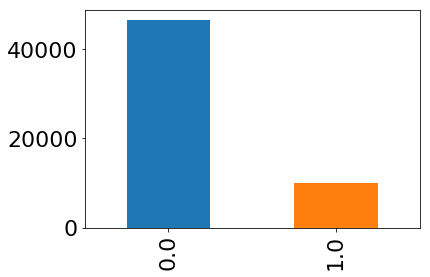

In [12]:
nperps_known = pd.DataFrame(np.where(terror["nperps"] == -99, 0.0 , 1.0))
nperps_count = nperps_known[0].value_counts()
print(nperps_count)
nperps_count.plot(kind="bar")

Okazuje się że dla ponad 80% przypadków ilość terrorystów biorących udział w ataku jest nieznana.
Może to dość mocno wpłynąć na "użyteczonść" tego parametru dla finalnego modelu.

#### Analiza danych kategorycznych

Większość danych w datasecie to dane kategoryczne.
Podczas fazy EDA sprawdzę trzy "perspektywy":

1. Dane określające czas ataku (imonth - miesiąc, iday - dzień)
2. Dane określające lokalizację ataku ( region_txt - kontynent, country_txt - kraj)
3. Dane określające specyfikę ataku (weaptype1_txt - użyta broń, attacktype1_txt - rodzaj ataku, targtype1_txt - cel ataku)

##### 1.Sprawdzamy rozłożenie zmiennych dotyczących czasu:

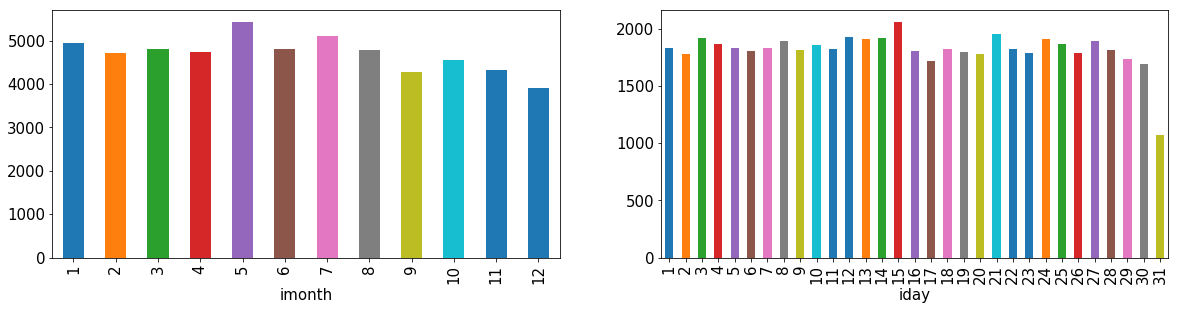

In [13]:
fig = plt.figure(figsize=(20,10)) 
plt.rcParams.update({'font.size': 15})

ax1 = fig.add_subplot(221)
terror['imonth'].groupby(terror['imonth']).count().plot(kind='bar')

ax2 = fig.add_subplot(222)
terror['iday'].groupby(terror['iday']).count().plot(kind='bar')

Analiza rozłożenia zmiennych określających miesiąc (imonth) w którym wykonano atak i dzień w miesiącu. Pokazuje że ataki rozkładają się w miarę równomiernie jeżeli chodzi o czas.

#### Sprawdzamy rozłożenie zmiennych dotyczących miejsca ataku

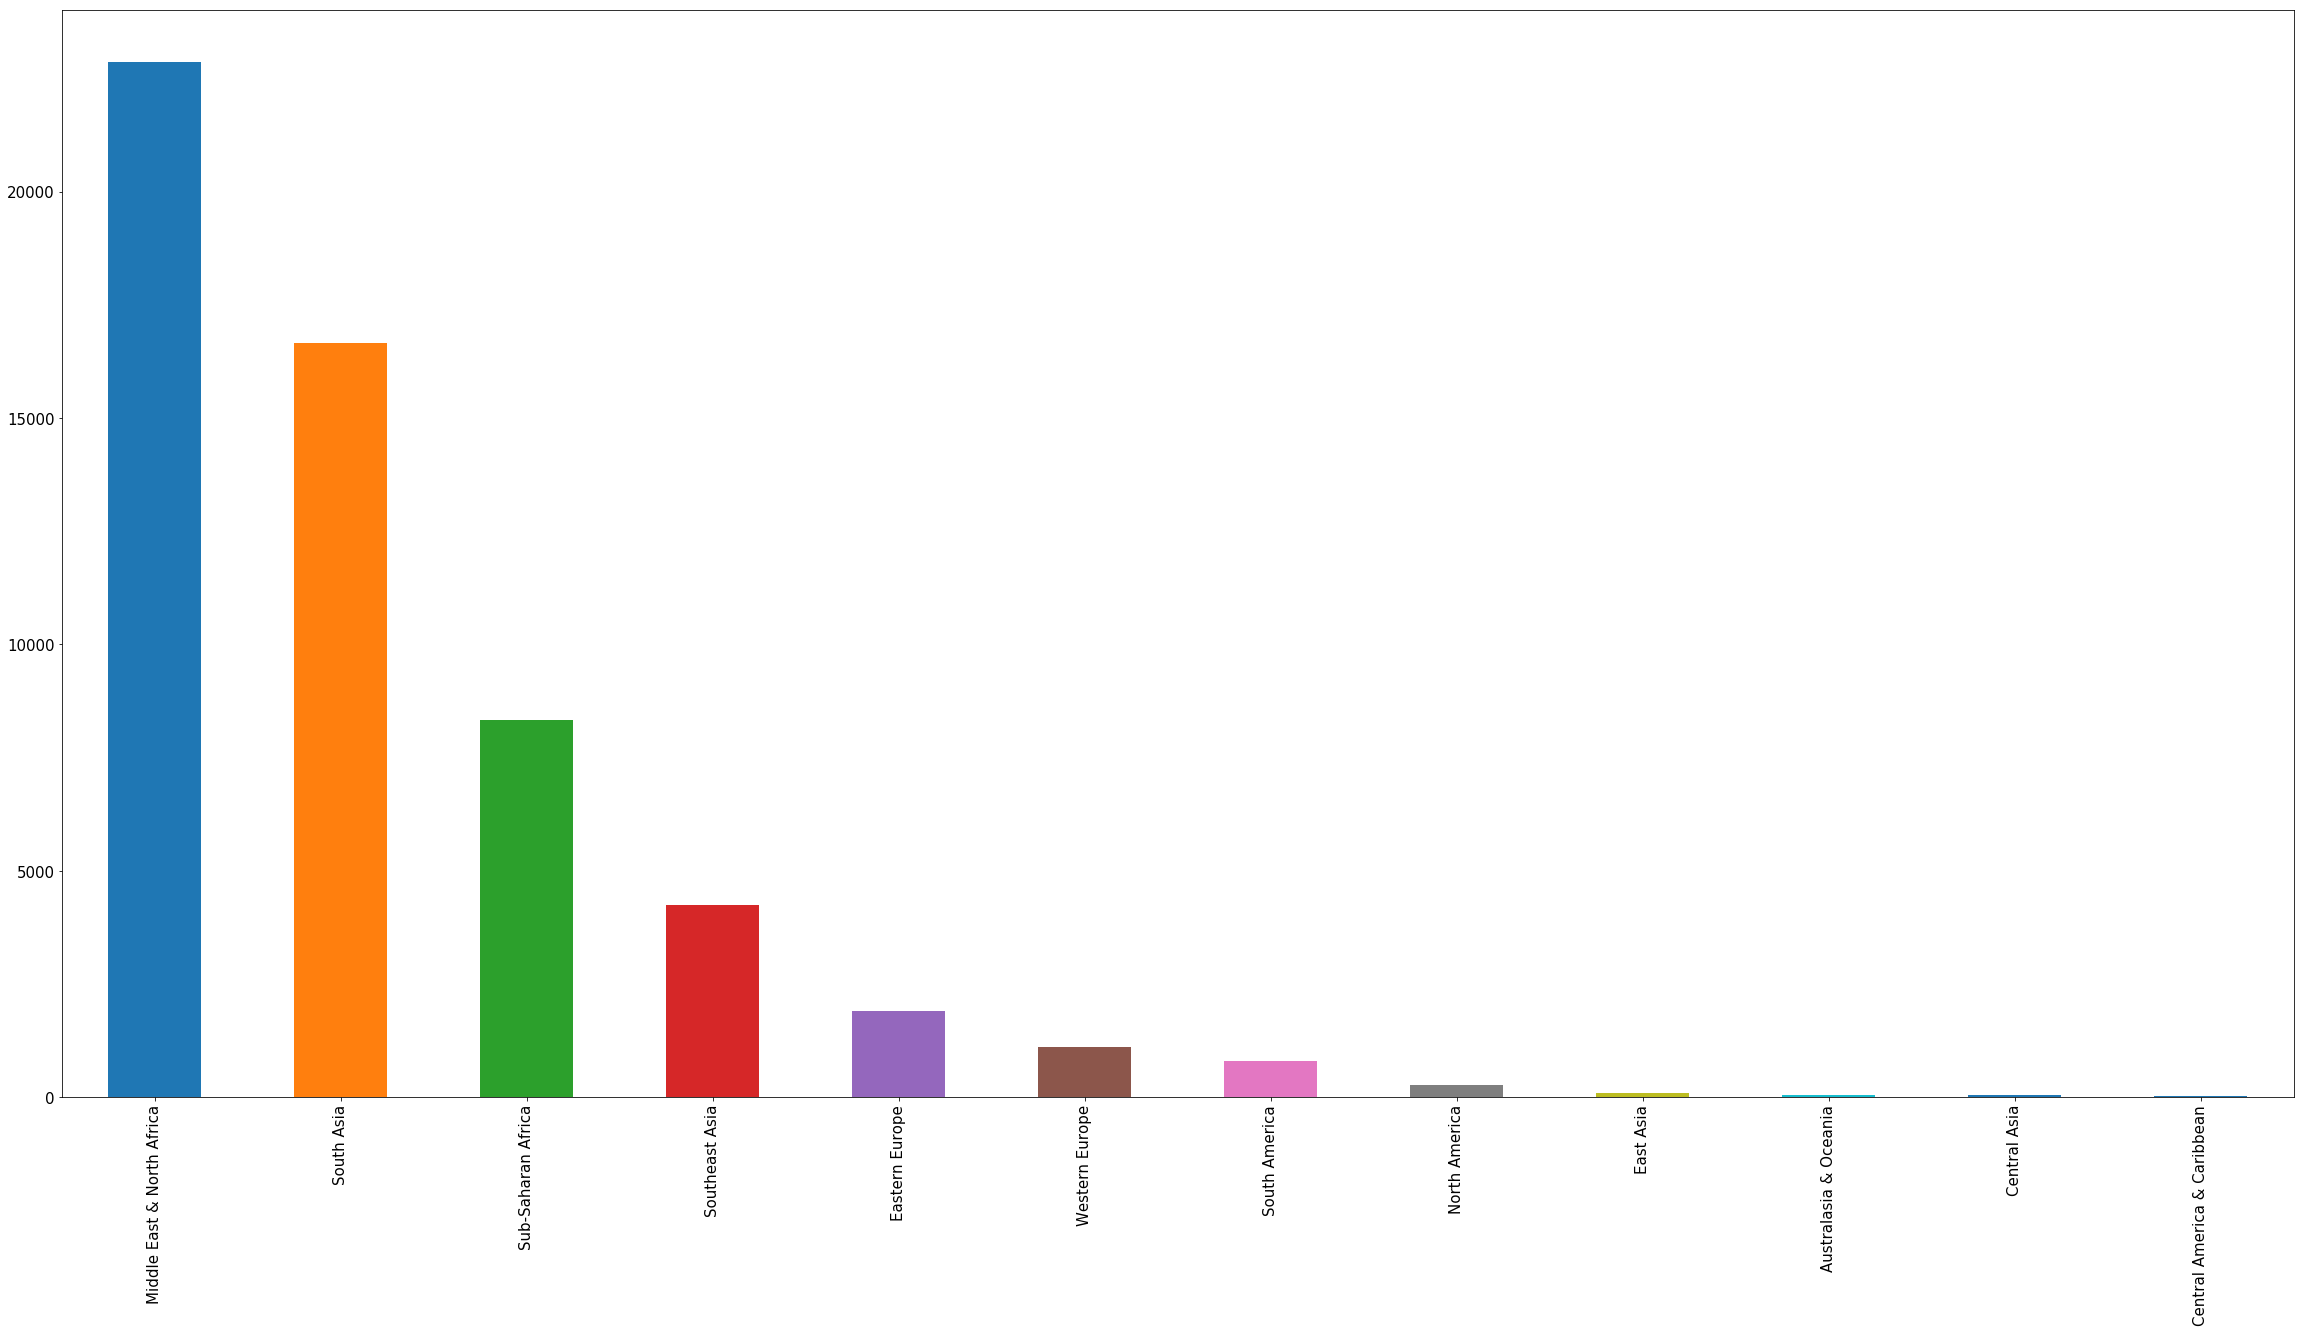

In [14]:
fig = plt.figure(figsize=(40,20)) 
terror['region_txt'].value_counts().plot(kind='bar')

Analiza rozłożenia ataków względem regionów (obszary nieco bardziej podzielone niż kontynenty) pokazuje,
że dane nie są zbalansowne pod względem geograficznym. 
Sprawdzenie rozłożenia wykorzystując atrybut (country_txt) oraz (city_txt) pokazuje że incydenty terrrorystyczne są "skumulowane" w kilku miejscah/regionach zapalnych na świecie.
*Bierzemy do anality jedynie 20 pierwszych wartości* 

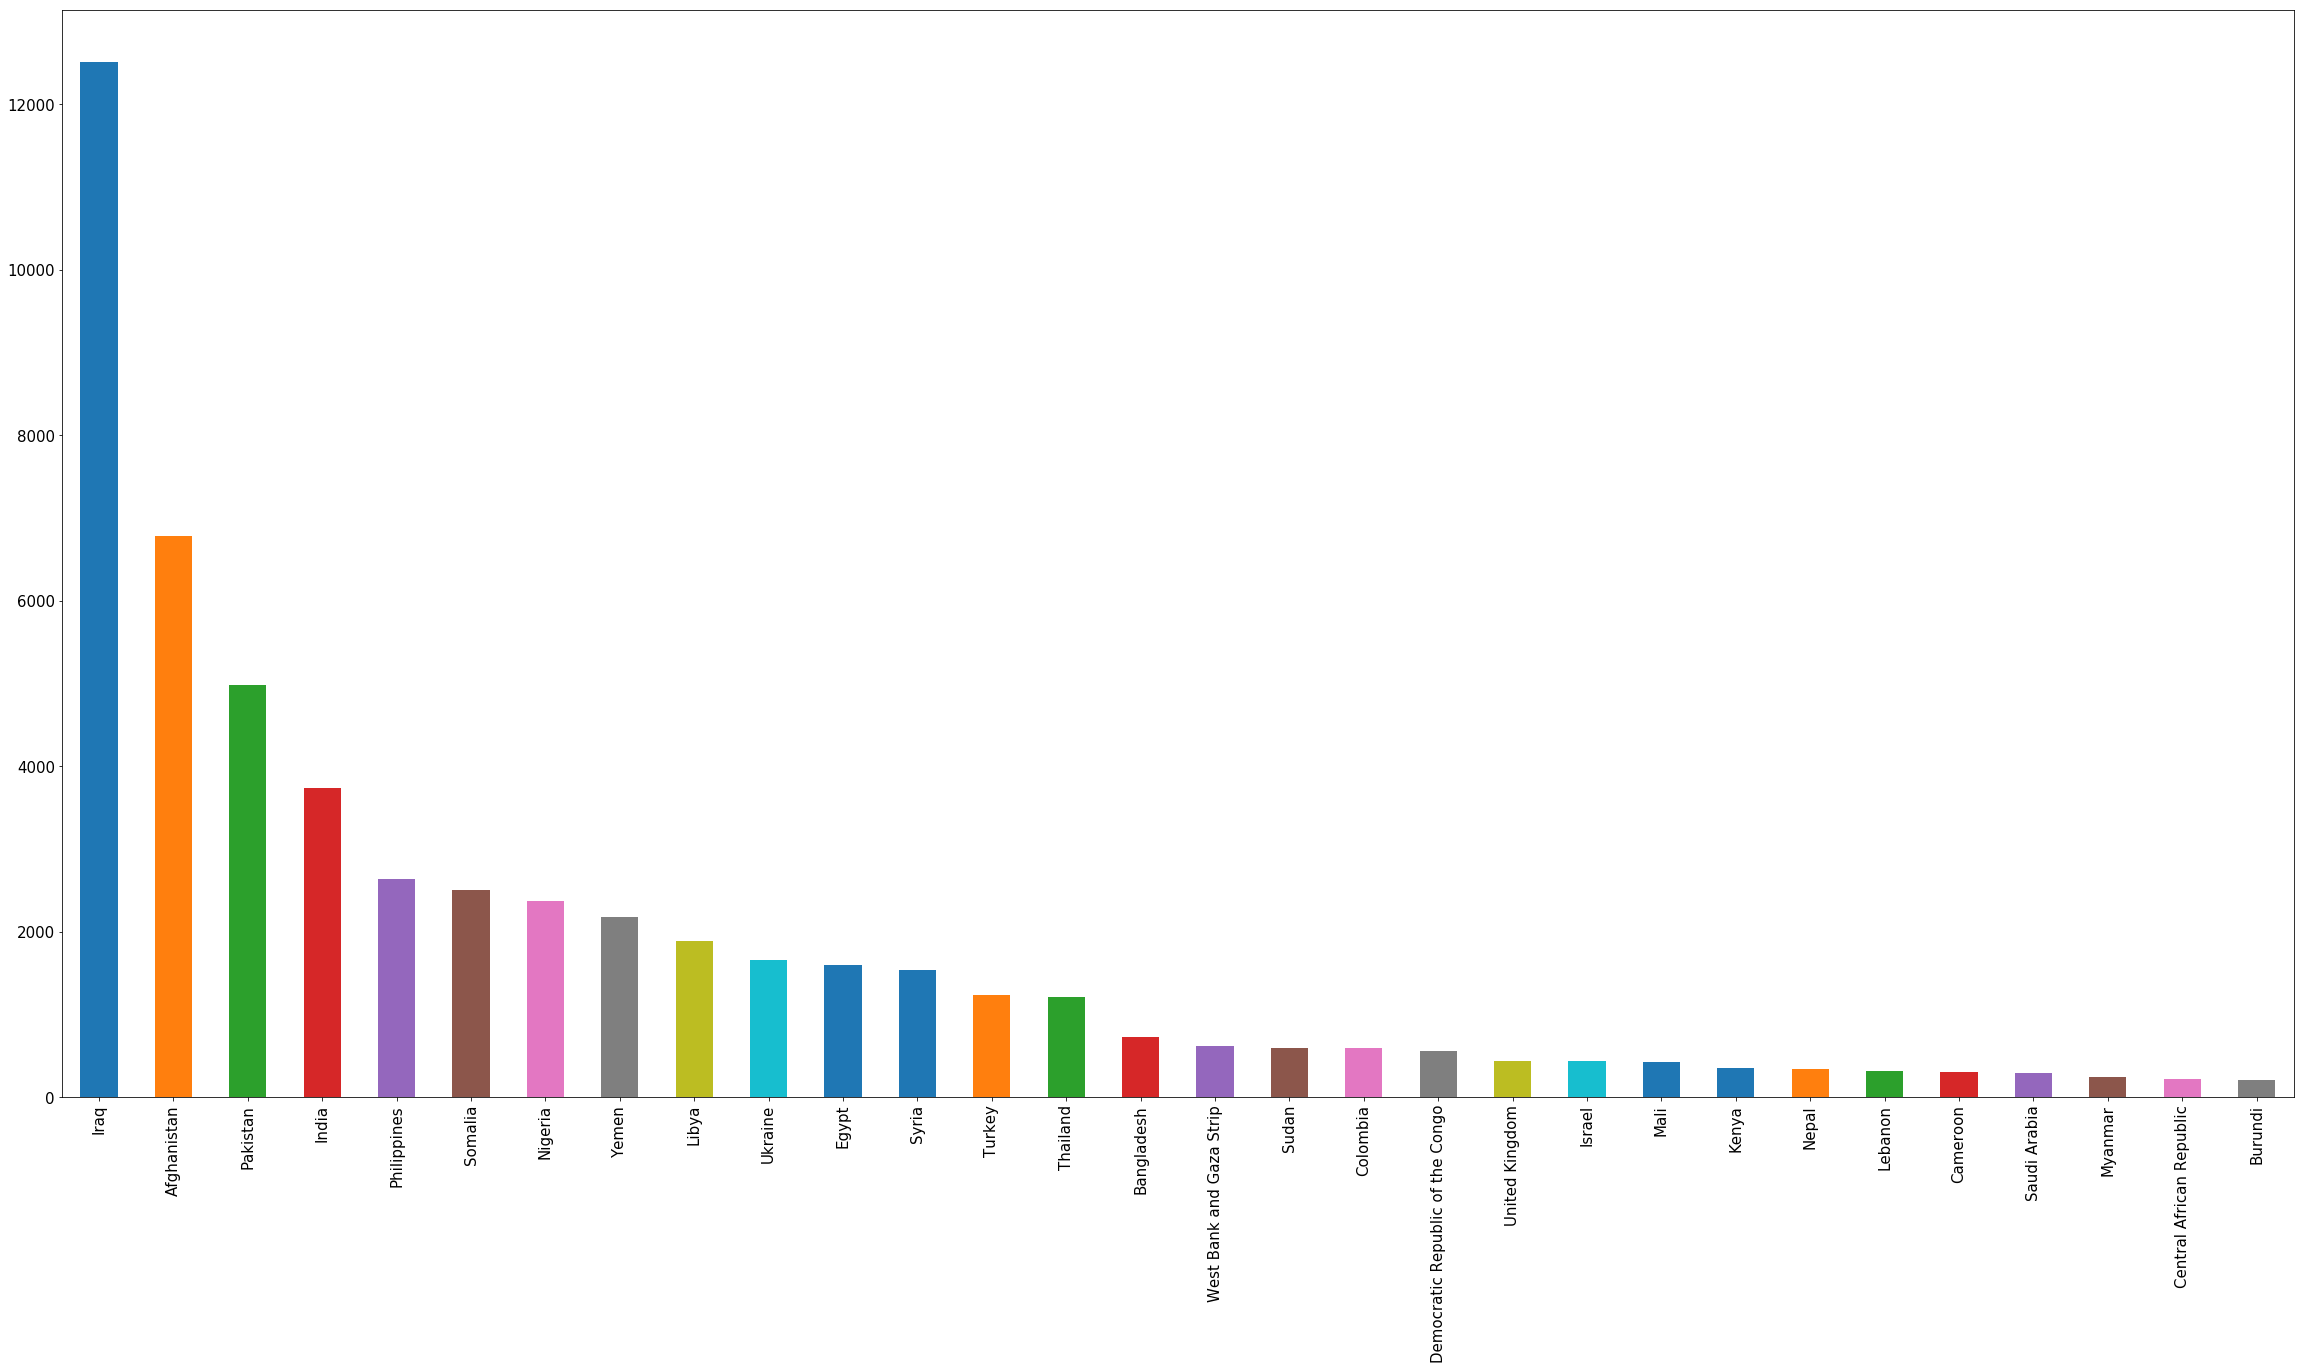

In [15]:
countrytop20 = terror['country_txt'].value_counts().head(30)
countrytop20.plot(kind="bar", figsize=(40,20))

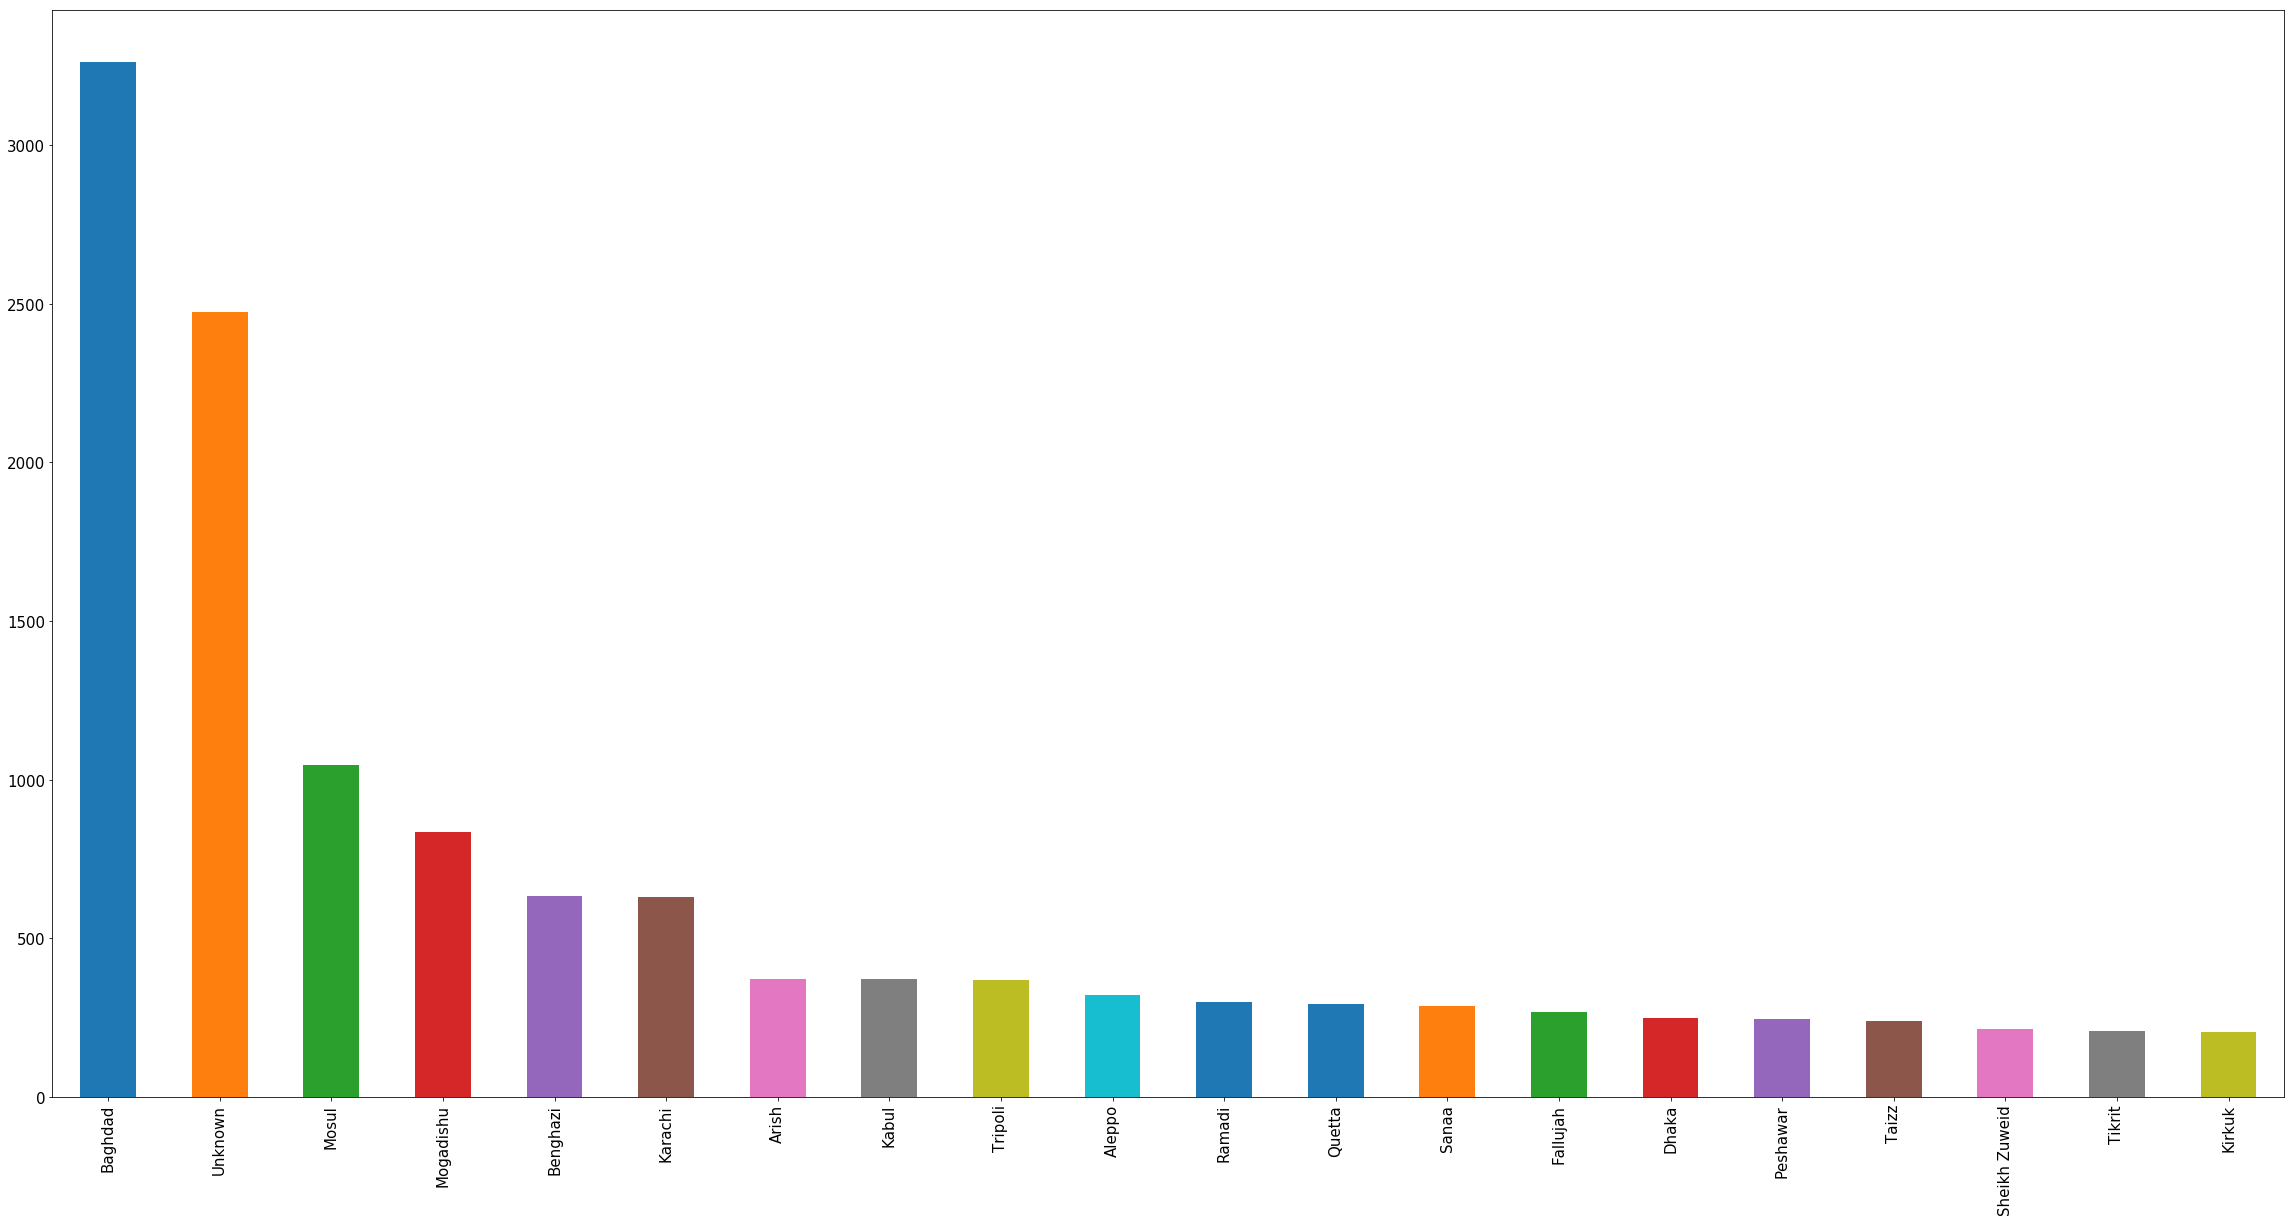

In [16]:
citytop20 = terror['city'].value_counts().head(20)
citytop20.plot(kind="bar", figsize=(40,20))

#### Sprawdzamy rozłożenie zmiennych dotyczących specyfiki ataku

In [17]:
# Zmiana nazw niektórych kolumn (z bardzo dlugich) na takie żeby mogły być czytelnie wyświetlone
terror['weaptype1_txt'] = terror['weaptype1_txt'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
terror['attacktype1_txt'] = terror['attacktype1_txt'].replace('Hostage Taking (Barricade Incident)', 'Hostage Taking (Barricade)')

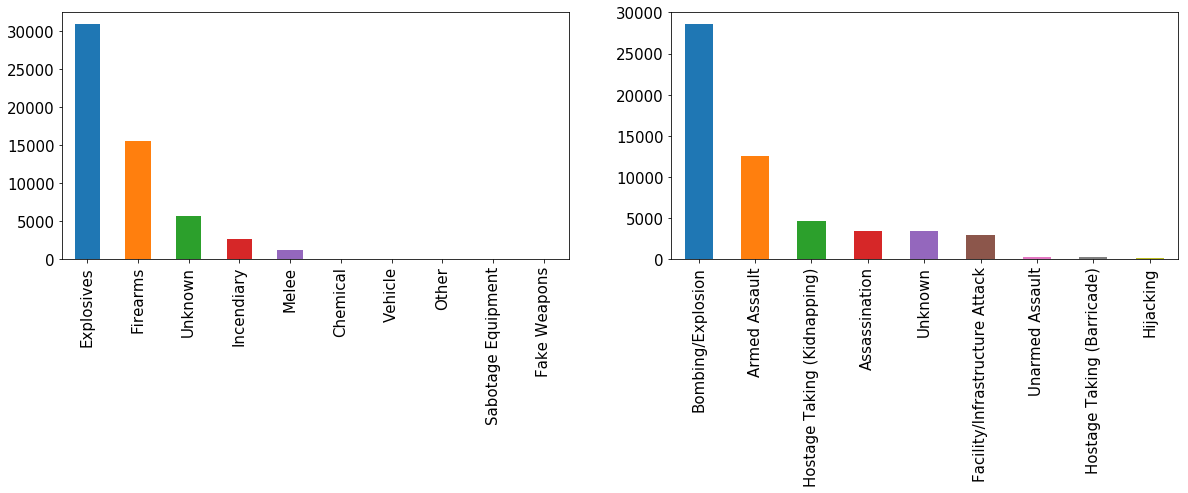

In [18]:
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(20,10)) 

ax1 = fig.add_subplot(221)
terror['weaptype1_txt'].value_counts().plot(kind='bar')

ax2 = fig.add_subplot(222)
terror['attacktype1_txt'].value_counts().plot(kind='bar')

* Większość ataków wykorzystuje broń kategorii: "Explosives" oraz "Firearms"
* Większość ataków jest typu: "Bombing/Explosions" oraz "Armed Assault"

Można przypuszczać że te dwie kategorie są bardzo mocno skorelowane (lub wręcz dublujące się) - oprócz danych wskazuje na to sam opis kolumn.
Sprawdźmy to przypuszczenie badając ilość kombinacji danych typów (20 najczęstrzych):

In [19]:
atak_vs_bron = terror[['attacktype1_txt', 'weaptype1_txt']]
atak_vs_bron.groupby(['weaptype1_txt','attacktype1_txt']).size().to_frame('size').sort_values('size', ascending=False).reset_index().head(20)

,weaptype1_txt,attacktype1_txt,size
0,Explosives,Bombing/Explosion,28545
1,Firearms,Armed Assault,10423
2,Unknown,Unknown,3422
3,Firearms,Hostage Taking (Kidnapping),2281
4,Firearms,Assassination,2250
5,Incendiary,Facility/Infrastructure Attack,2172
6,Unknown,Hostage Taking (Kidnapping),1692
7,Explosives,Armed Assault,1233
8,Explosives,Assassination,968
9,Melee,Armed Assault,593


Widać że korelacja jest znaczna (większość ataków Explosives = Bombing/Explosion oraz Firearms = Armed Assault) ale nie jest to w 100% pokrywająca się zależność. Występują kombinacje inne (np: Firearms - Hostage Taking , Explosives - Armed Assault) itd.

Z tego względu w datasecie nie będę usuwał żadnej z tych kolumn.

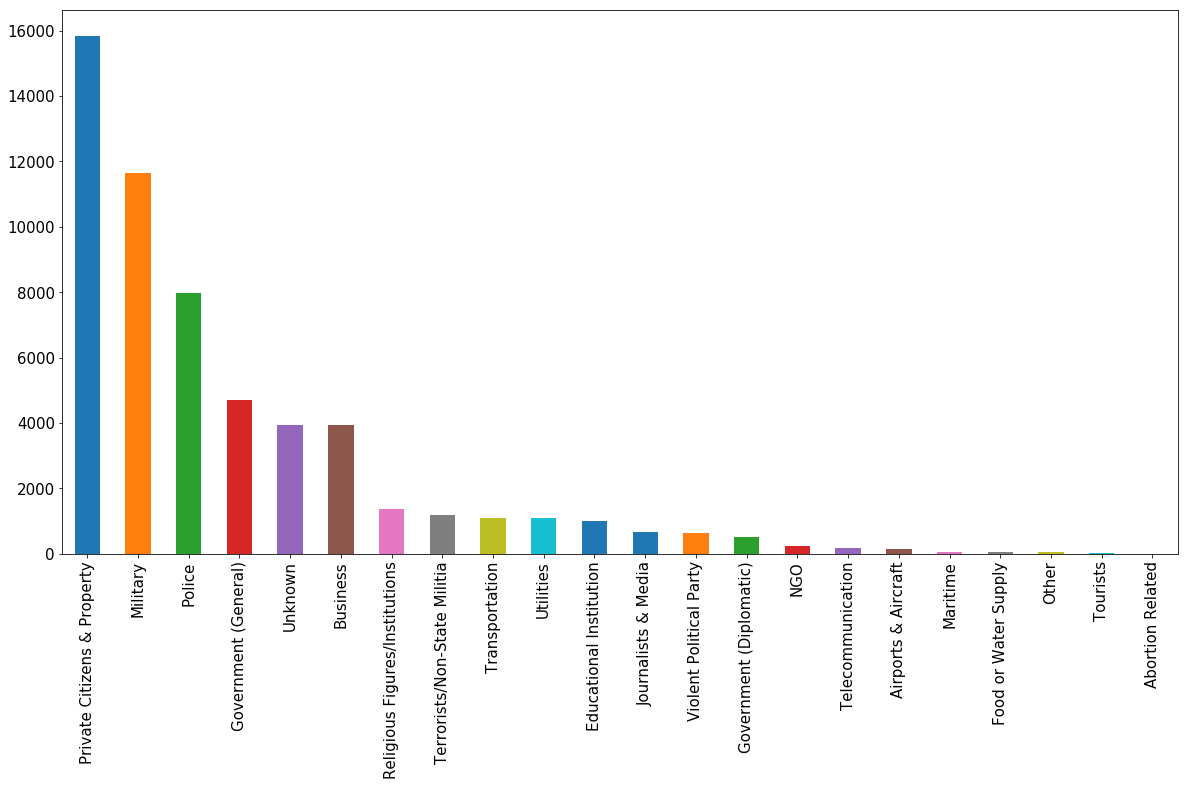

In [20]:
fig = plt.figure(figsize=(20,10)) 
terror['targtype1_txt'].value_counts().plot(kind='bar')

Jeżeli chodzi o rodzaj celu ataku to dane nie są rozłożone równomiernie ale nie ma też pojedynczej kategorii która całkowicie "zdominowała" by cały data set. 

### 2.7 Podsumowanie fazy EDA

Z fazy EDA mam następujące wnioski:
    
* Dane są w większości danymi kategorycznymi - często liczba kategorii przekracza 100 lub nawet 1000
* W danych występuje wiele braków 
* Część kolumn dubluje informacje (są np: kolumny opisujące tą samą wartość raz jako tekst (np: nazwa kraju), raz jako kod)
* Są też kolumny dzielące się na podkategorie
* Duża część kolumn ma dane mocno niezbilansowane - widać to na przykład w danych geograficznych. Wiele incydentów skupia się w relatywnie niewielkiej liczbie miast/krajów
* Zmienną opisywaną nie będzie ilość ofiar ataku (co było planem początkowym) ale stwierdzenie czy atak powodował czy nie powodował ofiary.


---

# 3. Czyszczenie danych

Zadania wykonane podczas tej fazy:    
    
    3.1  Usunięcie niechcianych obserwacji (Duplikaty, dane nieadekwatne)
    3.2  Sprawdzenie błędów w "strukturze" danych
    3.3  Usunięcie niepotrzebnych "Outlier"-ów
    3.4  Usunięcie brakujących danych
    3.5  Zmiana typów
    3.6  Podsumowanie

Uwaga:

Podczas czyszczenia nie analizowałem zawartości merytorycznej kolumn. Nawet jeżeli sytuacja była jasna że dana kolumna się nie przyda do trenowania modelu (bo np: zawiera informacje nieznane w momencie wydarzenia) to i tak ją na tym etapie czyściłem i zostawiałem.
Eliminacja poszczególnych kolumn, usunięcie dubli itd. będzie miało miejsce podczas fazy kolejnej.

###  3.1 Usunięcie niechcianych obserwacji 

W przypadku tego projektu korzystamy nie z własnoręcznie przygotowanych danych (np: uzyskanych za pomocą webscrappingu lub stworzonych z kilku niezależnych źródeł) ale przygotowanej wcześniej bazy.
Dlatego w tym przypadku nie ma potrzeby sprawdzania czy rekordy się nie dublują oraz czy nie ma danych nie związanych z badanym zagadanieniem

### 3.2 Sprawdzenie błędów w "strukturze" danych

Ten element czyszczenia danych także został "zaadresowanych" przez twórców bazy. Dane są dobrze ustrukturyzowane i nie ma przypadków gdzie trzeba korygować dublujące się kategorie (np: wszystkie kraje występują pojedynczo w zmiennej country i każdy z nich ma odpowiadający mu kod liczbowy, nie ma ryzyka występowania osobno np: UK i United Kingdom)

### 3.3 Usunięcie niepotrzebnych "Outlier"-ów

Kolejny punkt który został wykonany przez twórców bazy GTD. Uznajemy dane z tej bazy za wiarygodne i nie posiadające obserwacji odstających które były w jakiś sposób wadliwe lub nie oddające rzeczywistego przypadku.

### 3.4 Usunięcie brakujących danych

Ta część będzie najbardziej czasochłonna - gdyż w wielu kolumnach są wartości NAN.

Ilość parametrów opisujących każdy incydent/atak to:

In [21]:
terror.shape[1]

135


Podczas fazy EDA odkryliśmy że:
1. Duża część z nich dla wielu incydentów jest określona jako NaN
2. W części parametrów do użycia wartości "nieznana" (czyli de facto: brakująca) używane są różne wielkości liczbowe (-9 i -99) które mogą "zaburzać" wielkości prawidłowe (np: w punkcie 2.6 badanie wielkości **nperps**) 

#### Usunięcie wartości NaN

Sprawdzmy ile wielkości NaN występuje w każdej z kolumn:

In [22]:
terror.isnull().sum().where(terror.isnull().sum()>0).dropna().sort_values(ascending=False)

weapsubtype4          56355.0
resolution            56355.0
weaptype4             56355.0
weaptype4_txt         56355.0
weapsubtype4_txt      56355.0
gsubname3             56338.0
kidhijcountry         56334.0
divert                56304.0
claimmode3            56280.0
claimmode3_txt        56280.0
gsubname2             56268.0
attacktype3           56135.0
attacktype3_txt       56135.0
gname3                56132.0
guncertain3           56132.0
claim3                56132.0
ransomnote            56107.0
ransompaid            56044.0
ransomamtus           56044.0
ransompaidus          56044.0
ransomamt             56043.0
compclaim             55996.0
claimmode2            55996.0
claimmode2_txt        55996.0
targsubtype3          55922.0
targsubtype3_txt      55922.0
natlty3               55914.0
natlty3_txt           55914.0
targtype3             55913.0
corp3                 55913.0
target3               55913.0
targtype3_txt         55913.0
weapsubtype3_txt      55541.0
weapsubtyp

Widać że dla wielu kolumn więszkość ich wartości stanowi NaN. Przjmijmy arbitranie wielkość 30.000 jako tą dla której kolumna z większą ilością wartości NaN zostaje usunięta z datasetu.

##### <span style="color:red">UWAGA:</span>
Sytuację tę można by zaadresować lepiej - np:
* Zamieniając dane kolumny na wartość binarną ( ZNANA=1 , NIE ZNANA=0)
* Dane wielokrotne (np: weapsubtype2-4 które mówią o jakie inne kategorie broni zostaly użyte podczas ataku) dodać do odpowiednich rekordów po rozbiciu kolumny "głównej" (np: weapsubtype1) przy "one hot encoding"

Nie zdecydowałem się na ten ruch z dwóch powodów:
1. Data set i tak ma bardzo dużo parametrów, które sa w większości kategoryczne (więc ciężko będzie mi zredukować wymiarowość). Nie chciałem dorzucać następnych które najprawdopodobniej mają małą wartość
2. Dane wielkorotne są w większości puste - też ich uwzględnienie wpłyneło by na niewielki promil rekordów

In [23]:
terror = terror.dropna(axis=1,thresh=30000)

Po odrzuceniu kolumn mających więcej niż 30.000 NaN w dalszym ciągu mamy tyle brakujących wartości:

In [24]:
terror.isnull().sum().where(terror.isnull().sum()>0).dropna().sort_values(ascending=False)

scite2              21765.0
weapsubtype1_txt     5852.0
weapsubtype1         5852.0
nwound               5460.0
targsubtype1_txt     4350.0
targsubtype1         4350.0
nkill                3220.0
nwoundte             2327.0
nkillter             1310.0
natlty1_txt           754.0
natlty1               754.0
longitude             317.0
latitude              317.0
nwoundus               14.0
nkillus                 9.0
provstate               2.0
multiple                1.0
dtype: float64

Po kolei przyjrzymy się każdej z w/w kolumn w celu podjęcia decyzji jak uzupełnić wartości Nan

* **scite2**

Jest to atrybut określający drugie źródło które opisało danych incydent. Jeżeli występuje to jest to tekst (zwykle nagłowek artykułu, lub krótki opis + informacja o źródle). Dlatego do zaadresowania wartości NAN dla scite2 najlepiej zastąpić je pustymi łańcuchami:

In [25]:
terror['scite2'] = terror['scite2'].fillna(value=" ")

* **nkill**

Zmienna nkill (iloś zabitych ofiary+terroryści) to nasza zmienna Target. Dlatego w przypadku gdy występuje w niej wartość NaN to ten rekord powinniśmy usunąć. 

In [26]:
terror = terror.dropna(subset=['nkill'])

* **targsubtype1 , targsubtype1_txt**

Te wartości określają (jednak kod, druga opis tekstowy) podkategorię do jakiej należy cel zaatakowany w danymi incydencie.
Sprawdzmy jaka jest główna kategoria celu występująca w przypadku tych incydentów:

In [27]:
subtype1_nan = terror['targtype1_txt'].where(terror['targsubtype1_txt'].isna()).dropna()

In [28]:
subtype1_nan.value_counts()

Unknown                           3916
Business                           150
Journalists & Media                 92
Telecommunication                   26
Government (General)                21
NGO                                 21
Educational Institution             13
Other                               12
Violent Political Party              4
Private Citizens & Property          4
Utilities                            2
Government (Diplomatic)              2
Religious Figures/Institutions       2
Transportation                       2
Maritime                             1
Name: targtype1_txt, dtype: int64

Dla zdecydowanej większości przypadków gdy podkategoria celu jest NaN, kategoria główna to **Unknown**.
Sprawdzając w dokumentacji (Codebook.pdf) w przypadku "Unknown" nie ma podkategorii:

* *Unknown [No corresponding target subtypes]* 

Dlatego najlepszym wyjściem będzie zamiana w tym przypadku wartości dla tarsubtype1_txt na "Unknown" a dla targsybtype1 wartości 999 (nie używana jako kod żadnej innej istniejącej podkategorii)

In [29]:
terror['targsubtype1'] = terror['targsubtype1'].fillna(value=999)
terror['targsubtype1_txt'] = terror['targsubtype1_txt'].fillna(value="Unknown")

* **weapsubtype1 , weapsubtype1_txt**

W przypadku tych zmiennych określających podtyp użytej broni. Mamy analogiczną sytuację co w przypadku poprzednim.
Postępujemy analogicznie czyli sprawdzamy kategorie "główne" w danych incydentach:

In [30]:
subweapon_nan = terror['weaptype1_txt'].where(terror['weapsubtype1_txt'].isna()).dropna()

In [31]:
subweapon_nan.value_counts()

Unknown               4327
Vehicle                 80
Other                   41
Sabotage Equipment      30
Melee                   24
Chemical                19
Fake Weapons             3
Explosives               2
Incendiary               1
Firearms                 1
Name: weaptype1_txt, dtype: int64

Wynik mamy analogiczny czyli większość incydentów z wartością NaN dla podkategorii broni, ma wartość "Unknown" dla kategorii głównej. Działamy identycznie jak powyżej czyli nadajemy wartości "Unknown" i 999

In [32]:
terror['weapsubtype1'] = terror['weapsubtype1'].fillna(value=999)
terror['weapsubtype1_txt'] = terror['weapsubtype1_txt'].fillna(value="Unknown")

* **latitude i longitude**

To są zmienne określające współrzędne geograficzne.
Sprawdźmy jak brakujące dane mapują się na informację o mieście gdzie miał miejsce incydent

In [33]:
lat_long_na = terror['city'].where(terror['latitude'].isna()).dropna()
lat_long_na.value_counts()

Unknown              238
Gaberi                 2
Wye                    2
Ngaboko                2
Karena                 1
Glawi                  1
Diya                   1
Chre district          1
Naimiya                1
Dubuwa                 1
Cuero Fresco           1
Bourj el-Barajneh      1
Bamou                  1
Kaiga Kinguirya        1
Purbopara              1
As Saq                 1
Djimo                  1
Dushanbe               1
An Nubai               1
Quzaniyah              1
Sarma                  1
Burdhuhunle            1
Az Zahr al-Humar       1
Mangala                1
Wadi Budhak            1
Mubarak al-Farhan      1
Baugan                 1
Maharajgunj            1
At Tawal               1
Name: city, dtype: int64

W większości przypadków miasto także jest nieznane. Sprawdzmy kolejne przybliżenie czyli prowincję: provstate

In [34]:
lat_long_na = terror['provstate'].where(terror['latitude'].isna()).dropna()
lat_long_na.value_counts()

Unknown    268
unknown      1
Name: provstate, dtype: int64

Dalej nic - sprawdźmy państwo:

In [35]:
lat_long_na = terror['country_txt'].where(terror['latitude'].isna()).dropna()
lat_long_na.value_counts()

Afghanistan                         37
Yemen                               32
Iraq                                29
Libya                               15
Syria                               15
Mali                                13
Colombia                            11
Central African Republic             9
Pakistan                             9
Cameroon                             8
Turkey                               8
Saudi Arabia                         8
Egypt                                7
India                                5
Nigeria                              4
Chad                                 4
Paraguay                             4
Chile                                4
Ukraine                              4
Israel                               4
Philippines                          3
Somalia                              3
Nepal                                3
Bangladesh                           2
Mozambique                           2
Tunisia                  

Najlepszym sposobem na usunięcie tych wartości NaN było by przypisanie do nich pewnych uśrednionych wartości (np: współrzędne stolicy, albo dominanty z danego państwa) związanych z danym państwem.
Ponieważ jednak dotyczy to mniej niż 0.5% danych tak więc usuwam rekordy z NAN z datasetu.

In [36]:
terror = terror.dropna(subset=['latitude'])

* **natlty1 , natlty1_txt**

W zmiennej znajduje sie kod (i nazwa) kraju z ktorego pochodzila ofiara ataku.

Sprawdzmy w jakim kraju nastapil atak:

In [37]:
natlty1_na = terror['country_txt'].where(terror['natlty1'].isna()).dropna()
natlty1_na.value_counts().head(10)

Afghanistan                 561
Somalia                      51
West Bank and Gaza Strip     35
Germany                      24
Israel                       23
Sweden                       13
Syria                        10
Finland                       6
Mali                          3
Nigeria                       1
Name: country_txt, dtype: int64

Większośc to Afganistan. Sprawdzmy jakiej narodowosci ofiary sa zwykle podczas atakow w Afganistanie, oraz w drugim najczesciej wystepujacym kraju Somalii:

In [38]:
afga_ofiary = terror['natlty1_txt'].where(terror['country_txt'] == "Afghanistan").dropna()
afga_ofiary.value_counts().head(10)

Afghanistan      5648
International     190
United States      12
India              10
Pakistan           10
Germany             3
Australia           2
Tajikistan          2
Turkey              2
Iraq                1
Name: natlty1_txt, dtype: int64

In [39]:
soma_ofiary = terror['natlty1_txt'].where(terror['country_txt'] == "Somalia").dropna()
soma_ofiary.value_counts().head(10)

Somalia                 1605
International            282
Turkey                    11
Kenya                      8
Tanzania                   1
United Arab Emirates       1
Qatar                      1
China                      1
United States              1
India                      1
Name: natlty1_txt, dtype: int64

Poniewaz zdecydowana wiekszosc ofiar pochodzi z kraju gdzie atak wystapił, więc dobrym rozwiazaniem będzie zastapienie wartosci NaN w kolumnie narodowosc wartoscia rowna miescu (krajowi) gdzie atak nastapil

In [40]:
terror['natlty1'] = terror['natlty1'].fillna(value=terror['country'])
terror['natlty1_txt'] = terror['natlty1_txt'].fillna(value=terror['country_txt'])

* **provstate , multiple, nkillus, nwoundus**

Ilość wielkości NAN dla powyższych danych: 

* provstate       2.0
* multiple        1.0
* nkillus         4.0
* nwoundus        9.0

W stosunku do ilości rekordów (50.000+), ilość rekordow gdzie dla powyższych argumentów mamy wartość NaN jest pomijalnie mała. Dlatego nie uzupełniam tych rekordów tylko je usóuam.

In [41]:
terror = terror.dropna(subset=['provstate','multiple','nkillus','nwoundus'])

* **nkillter**

Ta zmienna opisuje ilość zabitych terrorystów.

Sprawdzmy jak rozkłada się informacja o ilości biorących w ataku terrorystów (nperps) w przypadku gdy liczba zabitych jest NAN:  

In [42]:
nkillter_na = terror['nperps'].where(terror['nkillter'].isna()).dropna()
nkillter_na.value_counts()

-99.0      423
 100.0       8
 20.0        5
 200.0       3
 15.0        2
 12.0        2
 1000.0      2
 3.0         2
 30.0        2
 50.0        2
 500.0       1
 24.0        1
 60.0        1
 3000.0      1
 5.0         1
 150.0       1
 7.0         1
 6.0         1
 70.0        1
 27.0        1
 2.0         1
 1.0         1
 4.0         1
 700.0       1
 10.0        1
Name: nperps, dtype: int64

Dla większości sytuacji gdzie nie znamy ilości zabitych terrorystów nie znamy też ilości atakujacych terrorystów (to oznacza wartość -99).
Sprawdzmy jak rozkłada się ilość zabitych terrorystów w całym secie danych

In [43]:
terror['nkillter'].value_counts().head(10)

0.0     44955
1.0      3072
2.0      1081
3.0       736
4.0       478
5.0       321
6.0       278
7.0       184
10.0      157
8.0       154
Name: nkillter, dtype: int64

W ok 90% przypadków ilośc zabitych terrrorystów to 0
Zamieniam wartość Nan dla nkillter na 0

In [44]:
terror['nkillter'] = terror['nkillter'].fillna(value=0.0)

* **nwoundte**

Ranni(terroryści).

Sprawdzmy dla jakich wartości rannych sumarycznie nie mam informacji o rannych terrorystach:

In [45]:
nwound_na = terror['nwoundte'].where(terror['nwound'].isna()).dropna()
nwound_na.value_counts()

0.0     1579
2.0        4
1.0        3
3.0        1
12.0       1
16.0       1
Name: nwoundte, dtype: int64

Dla zdecydowanej większości NaN dla rannych terrorystów jest w przypadku gdy w ataku wogóle nie było rannych osób więć można to zastąpić 0

In [46]:
terror['nwoundte'] = terror['nwoundte'].fillna(value=0.0)

* **nwound**

Ilość rannych osób w ataku

In [47]:
terror['nwound'].value_counts().head(15)

0.0     27881
1.0      5457
2.0      3631
3.0      2694
4.0      1971
5.0      1638
6.0      1247
7.0      1193
8.0       858
9.0       554
10.0      487
11.0      302
12.0      284
13.0      203
20.0      173
Name: nwound, dtype: int64

In [48]:
terror['nwound'].describe()

count    50404.000000
mean         2.944945
std         12.303803
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max       1500.000000
Name: nwound, dtype: float64

Dla większości przypadków liczba rannych jest równa 0.0
Co prawdna średnia to ok 3 ale podnosi ja niewielka liczba dużych wartości.

NANy zastępujemy zerami.

In [49]:
terror['nwound'] = terror['nwound'].fillna(value=0.0)


#### Z bazy usuneliśmy wartości NaN

In [50]:
terror.isnull().sum().where(terror.isnull().sum()>0).dropna().sort_values(ascending=False)

Series([], dtype: float64)

Natomiast ciąle znajdują się w nich dane które są "sztucznie" dodanymi wartościami oznaczającycmi brak danych (np: wartości -9, -99, 99 i "Unknown). Dane opisane w ten sposób mogą zaburzyć model, który będzie je trakował jako "normalne" dane liczbowe.
Sprawdzmy w których kolumnach tego typu kłopot występuje:


In [51]:
terror9 = terror[terror[:] == -9]
count9 = terror9.shape[0] - terror9.isnull().sum()
count9 = count9.where(count9>0).dropna()
count9

property      9739.0
ishostkid      207.0
INT_LOG      27234.0
INT_IDEO     27234.0
INT_ANY      25854.0
dtype: float64

In [52]:
terror99 = terror[terror[:] == -99]
count99 = terror99.shape[0] - terror99.isnull().sum()
count99 = count99.where(count99>0).dropna()
count99

nperps      43234.0
nperpcap      251.0
dtype: float64

In [53]:
terror999 = terror[terror[:] == 999]
count999 = terror999.shape[0] - terror999.isnull().sum()
count999 = count999.where(count999>0).dropna()
count999

targsubtype1    4231.0
natlty1           18.0
weapsubtype1    4450.0
dtype: float64

In [54]:
terror_unk = terror[terror[:] == "Unknown"]
count_unk = terror_unk.shape[0] - terror_unk.isnull().sum()
count_unk = count_unk.where(count_unk>0).dropna()
count_unk

provstate               1.0
city                 2004.0
attacktype1_txt      2977.0
targtype1_txt        3887.0
targsubtype1_txt     4231.0
corp1               10681.0
target1              3886.0
gname               24683.0
weaptype1_txt        4253.0
weapsubtype1_txt     4450.0
dtype: float64

Wartość -9 i -99 wystęuje dla danych liczbowych (które może zaburzać) oraz kategorycznych

Wartość 999 i "Unknown" występuje dla danych kategorycznych gdzie jej obecność nam nie przeszkadza

Dla danych liczbowych usuńmy te kolumny gdzie ilość nieznanych jest większa niż 20.000

In [55]:
terror = terror.drop(['INT_LOG','INT_IDEO','INT_ANY', 'nperps'], axis=1)

Do wyczyszczenia pozostały zmienne:

* property      9739.0 (Czy w incydencie zostały uszkodzone jakieś "dobra")
* ishostkid      207.0 (Czy zostali wzięci zakładnicy)
* nperpcap      251.0 (Ilu terorystów zaostało złapanych)

Dwie pierwsze to dane kategoryczne, nprepcap to dane liczbowe.
Sprawdzmy jak się rozkładają:

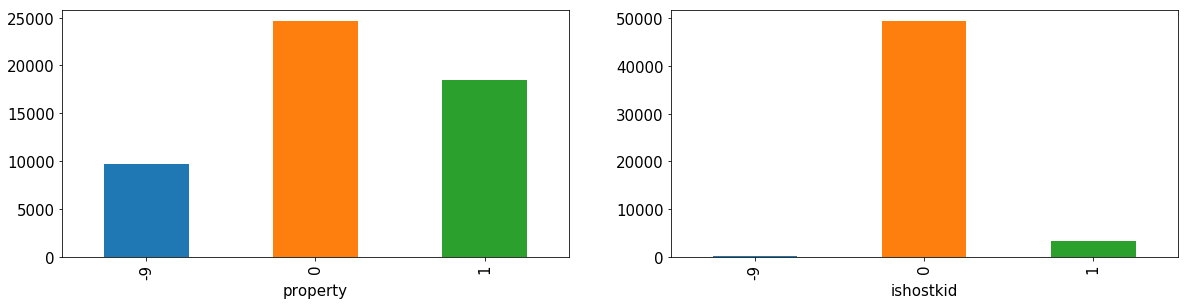

In [56]:
fig = plt.figure(figsize=(20,10)) 

ax1 = fig.add_subplot(221)
terror['property'].groupby(terror['property']).count().plot(kind='bar')

ax2 = fig.add_subplot(222)
terror['ishostkid'].groupby(terror['ishostkid']).count().plot(kind='bar')

* **Properity** to zmienna kategoryczna o dość zbilansowanym rozłożeniu wartości (zarówno te "prawidłowe" jak i wartość nieznana). Dlatego zostawiamy wartości -9 (nieznana) jako odrębna kategorię.
* Dla **ishostkid** dane są niezbalansowane - zdecydowana większość ma wartość 0. Dlatego -9 przypisuje do wartości 0

In [57]:
terror['ishostkid'] = terror['ishostkid'].replace(-9, 0)

Sprawdzmy rozkład zmiennej **nperpcap**

In [58]:
terror['nperpcap'].value_counts().head(10)

 0     50763
 1      1077
 2       355
-99      251
 3       175
 4        84
 5        42
 6        36
 8        16
 7        14
Name: nperpcap, dtype: int64

Wartość nperpcap ma dla większości przypadków wartość 0 , dlatego wartości nieznane (-99) zastępujemy zerami

In [59]:
terror['nperpcap'] = terror['nperpcap'].replace(-99, 0)

Dane wyczyszczone!

## 3.5 Zmiana typów

Zmienić trzeba typ w lang i long zmiennych ze string na float

In [60]:
terror['latitude'] = terror['latitude'].str.replace(",", ".").astype(float)

In [61]:
terror['longitude'] = terror['longitude'].str.replace(",", ".").astype(float)

usuwamy tez minusowe wartosci (model przy tym nie dzialal):

In [62]:
terror['latitude'].min()

-42.884049

In [63]:
terror['longitude'].min()

-123.333302

In [64]:
terror['latitude'] = terror['latitude'] + 43
terror['longitude'] = terror['longitude'] + 124

In [65]:
terror['latitude'].min()

0.11595100000000258

In [66]:
terror['longitude'].min()

0.6666979999999967

## 3.6 Podsumowanie czyszczenia danych

* Zdecydowana większość czasu została przeznaczona na usunięcie wartości NAN
* Oprócz "jawnie" podanych NaN-ów w kilku miejscach były też "zaszyte" wartości Unknown jako liczby (np: -9 czy -99). Zostawienie ich nieruszonych spowodowało by zaburzenie pracy modelu - szczególnie jeżeli te wartości mocno odbiegały od "prawidłowych"
* Korzystaliśmy z danych już przygotowanych przez kogoś innego więc elementy związane z wyszukiwaniem dubli, "zesłownikowaniem" danych, połączeniem danych z kilku źródeł itd... nie były potrzebne

---

# 4. Feature Engineering

Zadanie do wykonania na tym etapie
    
    4.1 Usunięcie niepotrzebnych cech
        4.1.1 ID
        4.1.2 Cech które nie będą znane w momencie predykcji
        4.1.3 Opisów tekstowych i cech zdublowanych
    4.2 Analiza i zmiana cech z bardzo wieloma kategoriami
    4.3 One hot encoding
    4.4 Podsumowanie

### 4.1 Usunięcie niepotrzebnych cech
#### 4.1.1 ID

In [67]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'ishostkid', 'scite1', 'scite2', 'dbsource', 'INT_MISC'],
      dtype='object')

Usuwamy kolumnę z ID:

In [68]:
terror = terror.drop(["eventid"], axis=1)

#### 4.1.2 Cech które nie będą znane w momencie predykcji

Usuwamy kolumny których nie znamy w momencie ataku:

* success
* nperpcap
* claimed
* nkillus
* nkillter
* nwound
* nwoundus
* nwoundte
* ishostkid
* scite1
* scite2
* gname
* property
* crit1
* crit2
* crit3
* natly1
* INT_MISC
* multiple
* individual
* natlty1_txt
* doubtterr
* guncertain1

Kolumny te opisują różne informacje których nie znamy w momencie ataku - kto się przyznał do ataku, ile osób zostało rannych, co kierowało terrorystami itd...

In [69]:
terror = terror.drop(['success','nperpcap','claimed','nkillus','nkillter','nwound','nwoundus','nwoundte','ishostkid','scite1','scite2','gname','property'], axis=1)

In [70]:
terror = terror.drop(['crit1', 'crit2', 'crit3', 'INT_MISC', 'multiple', 'individual', 'natlty1_txt', 'doubtterr', 'guncertain1' ], axis=1)

In [71]:
terror.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'summary', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'nkill',
       'dbsource'],
      dtype='object')

#### 4.1.3 Opisy tekstowe i duble

Usuwamy duble i opisy tekstowe:
* country
* region
* attacktype1
* targtype1
* targsubtype1
* natlty1
* weaptype1
* weapsubtype1
* summary

In [72]:
terror = terror.drop(['country','region','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','weapsubtype1','summary'], axis=1)

In [73]:
terror.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
       'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill',
       'dbsource'],
      dtype='object')

Usuwamy kolumny które nie powinny mieć znaczenia dla samego incydentu:

* dbsource = baza źródłowa gdzie incydent został zarejestrowany

In [74]:
terror = terror.drop(['dbsource'], axis=1)

Finalnie zostają na 22 kolumy 

In [75]:
terror.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
       'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill'],
      dtype='object')

In [76]:
terror.shape

(52853, 21)

## 4.2 Analiza i zmiana cech z bardzo wieloma kategoriami

W tej sekcji zajmiemy się kolumnami z danymi kategorycznymi o bardzo wielu kategoriach.
Są one problemem bo w przypadku rozłożenia ich na poszczególne "binarne" wartości za pomocą "One hot encoding" otrzymalibyśmy tysiące parametrów i w rezultacie nieprzeliczalny (na dostępnym sprzęcie) model.

Sprawamy ile unikalnych wartośći znajduje się w każdej kolumnie. Wykorzystamy do tego funkcję *sprawdz_unikaty()*, która jest zdefiniowana w sekcji EDA (2.4)

In [77]:
sprawdz_unikaty(terror)

 iyear		Unikalnych wartosci:4
 imonth		Unikalnych wartosci:12
 iday		Unikalnych wartosci:31
 extended		Unikalnych wartosci:2
 country_txt		Unikalnych wartosci:136
 region_txt		Unikalnych wartosci:12
 provstate		Unikalnych wartosci:1135
 city		Unikalnych wartosci:15302
 latitude		Unikalnych wartosci:23004
 longitude		Unikalnych wartosci:22823
 specificity		Unikalnych wartosci:4
 vicinity		Unikalnych wartosci:2
 suicide		Unikalnych wartosci:2
 attacktype1_txt		Unikalnych wartosci:9
 targtype1_txt		Unikalnych wartosci:22
 targsubtype1_txt		Unikalnych wartosci:110
 corp1		Unikalnych wartosci:9259
 target1		Unikalnych wartosci:14176
 weaptype1_txt		Unikalnych wartosci:10
 weapsubtype1_txt		Unikalnych wartosci:31
 nkill		Unikalnych wartosci:153


Co robimy z poszczególnymi kategoriami:

| KOLUMNA          	| UNIKALNYCH WARTOSCI 	| OPIS                          	|
|------------------	|---------------------	|-------------------------------	|
| iyear            	| 4                   	| Nie zmieniamy                 	|
| imonth           	| 12                  	| Nie zmieniamy                 	|
| iday             	| 31                  	| Nie zmieniamy                 	|
| extended         	| 2                   	| Nie zmieniamy                 	|
| country_txt      	| 136                 	| Zbyt dużo kategorii           	|
| region_txt       	| 12                  	| Nie zmieniamy                 	|
| provstate        	| 1135                	| Za dużo kategorii             	|
| city             	| 15302               	| Za dużo kategorii             	|
| latitude         	| 23004               	| Dane liczbowe - nie zmieniamy 	|
| longitude        	| 22823               	| Dane liczbowe - nie zmieniamy 	|
| specificity      	| 4                   	| Nie zmieniamy                 	|
| vicinity         	| 2                   	| Nie zmieniamy                 	|
| suicide          	| 2                   	| Nie zmieniamy                 	|
| attacktype1_txt  	| 9                   	| Nie zmieniamy                 	|
| targtype1_txt    	| 22                  	| Nie zmieniamy                 	|
| targsubtype1_txt 	| 110                 	| Za dużo kategorii             	|
| corp1            	| 9259                	| Za dużo kategorii             	|
| target1          	| 14176               	| Za dużo kategorii                	|
| weaptype1_txt    	| 10                  	| Nie zmieniamy                    	|
| weapsubtype1_txt 	| 31                  	| Za dużo kategorii               	|
| nkill            	| 153                 	| Zmienna opisywana - nie zmieniamy |


Dobrym sposobem na redukcję ilości kategorii jest wzięcie 20 najczęściej występujących a wszystkie pozostałe zaklasyfikowanie jako "Other".
Zróbmy tak dla zmiennych **city, provstate** i **country_txt**

In [78]:
miasta = list(terror['city'].value_counts().head(20).keys())
provstate = list(terror['provstate'].value_counts().head(20).keys())
country = list(terror['country_txt'].value_counts().head(20).keys())

In [79]:
terror.loc[~terror['provstate'].isin(provstate), 'provstate'] = "Other"
terror.loc[~terror['country_txt'].isin(country), 'country_txt'] = "Other"
terror.loc[~terror['city'].isin(miasta), 'city'] = "Other"

In [80]:
terror['city'].value_counts()

Other            40946
Baghdad           3229
Unknown           2004
Mosul              951
Mogadishu          741
Karachi            630
Benghazi           602
Kabul              368
Arish              367
Aleppo             305
Tripoli            301
Quetta             289
Ramadi             279
Sanaa              254
Fallujah           252
Dhaka              250
Peshawar           245
Taizz              226
Sheikh Zuweid      213
Kirkuk             202
Tikrit             199
Name: city, dtype: int64

In [81]:
terror['provstate'].value_counts()

Other                                  30104
Baghdad                                 3282
Al Anbar                                2133
Saladin                                 1981
Balochistan                             1711
Nineveh                                 1524
Diyala                                  1485
Khyber Pakhtunkhwa                      1249
North Sinai                              981
Donetsk                                  884
Borno                                    860
Federally Administered Tribal Areas      852
Sindh                                    769
Banaadir                                 756
Jammu and Kashmir                        692
Kirkuk                                   684
Benghazi                                 637
Babil                                    585
Chhattisgarh                             577
Nangarhar                                566
Helmand                                  541
Name: provstate, dtype: int64

In [82]:
terror['country_txt'].value_counts()

Iraq                                11908
Afghanistan                          6449
Other                                5685
Pakistan                             4856
India                                3611
Philippines                          2579
Nigeria                              2147
Somalia                              1964
Yemen                                1929
Libya                                1623
Egypt                                1570
Ukraine                              1552
Syria                                1308
Turkey                               1212
Thailand                             1206
Bangladesh                            720
West Bank and Gaza Strip              619
Colombia                              575
Sudan                                 451
Democratic Republic of the Congo      445
United Kingdom                        444
Name: country_txt, dtype: int64

Jak widać po powyższych zestwieniam zmienna **city** mocno "dubluje" się z zmienną **provstate**.
Usuwamy zmienna city jako nadmiarową:

In [83]:
terror = terror.drop(['city'], axis=1)

Teraz sprawdzmy dane w kolumnach:

| KOLUMNA          	| UNIKALNYCH WARTOSCI 	| OPIS                          	|
|------------------	|---------------------	|-------------------------------	|
| corp1            	| 9259                	| Za dużo kategorii             	|
| target1          	| 14176               	| Za dużo kategorii                	|


Wartości te oznaczają:

* **corp1**	Nazwa firmy/organizacji będącej celem ataku
* **target1**	Nazwa/opis konkretnej osoby (np.: soldier, officer, civilian itd....), budynku (np.: US Embassy)itd... Która była celem ataku

In [84]:
terror['corp1'].value_counts()

Unknown                                                                                      10681
Not Applicable                                                                                8672
Afghan Police                                                                                 1431
Iraqi Police Service (IPS)                                                                    1048
Iraqi Armed Forces                                                                             812
Iraqi Army                                                                                     784
Armed Forces of Ukraine                                                                        610
Pakistani Police                                                                               592
Afghan National Security Force (ANSF)                                                          488
Afghan National Army (ANA)                                                                     449
Philippine

Zmienna **Corp1** dla wielu przypadków przyjmuje wielkość "Unknown" lub "Not Applicable". Pozostałe ponad 9000 wartości występują w małej ilości.
Zamieńmy **Corp1** na zmienną "binarną":
* 0 gdy corp1 = Unknown lub Not Applicable
* 1 w pozostałych przypadkach

In [85]:
terror['corp1_known'] = terror['corp1']
terror.loc[((terror['corp1_known'] == "Unknown") | (terror['corp1_known'] == "Not Applicable")),'corp1_known'] = 0
terror.loc[terror['corp1_known'] != 0 ,'corp1_known'] = 1

In [86]:
terror[['corp1','corp1_known']].head()

,corp1,corp1_known
0,Cano Limon-Covenas Oil Pipeline,1
1,Jazeera Palace Hotel,1
2,Not Applicable,0
3,Unknown,0
5,Iraqi Army,1


In [87]:
terror = terror.drop(['corp1'], axis=1)

Teraz przyjrzyjmy się zmiennej Target1 (ponad 14000 kategorii):

In [88]:
terror['target1'].value_counts().head(15)

Unknown           3886
Civilians         3173
Soldiers          2174
Checkpoint        1874
Patrol            1725
Vehicle           1708
Village           1257
Officers          1048
Market             915
Convoy             794
House              707
Checkpost          553
Post               508
Base               504
Police Station     488
Name: target1, dtype: int64

In [89]:
terror['target1'].value_counts().tail(15)

Officer: Saghir Abbas                                                1
Vehicle of Civilian: Nayef Abu Tair                                  1
House of Candidate for Governor: Casely Omon-Irabor                  1
Military Hospital                                                    1
Photojournalist: Nadir al-Qadi                                       1
Municipal Social Welfare and Development Officer: Reynante Sardan    1
Alleged Informant: Muinan Kabasi                                     1
Subway                                                               1
Polio Vaccination Worker: Sanab Gul                                  1
Civilian: Siraj                                                      1
President: Hasan Sheikh Mahmud                                       1
Christian Civilian: Sunil Gomes                                      1
Zilkan Military Camp                                                 1
Pipeline Engineers                                                   1
Civili

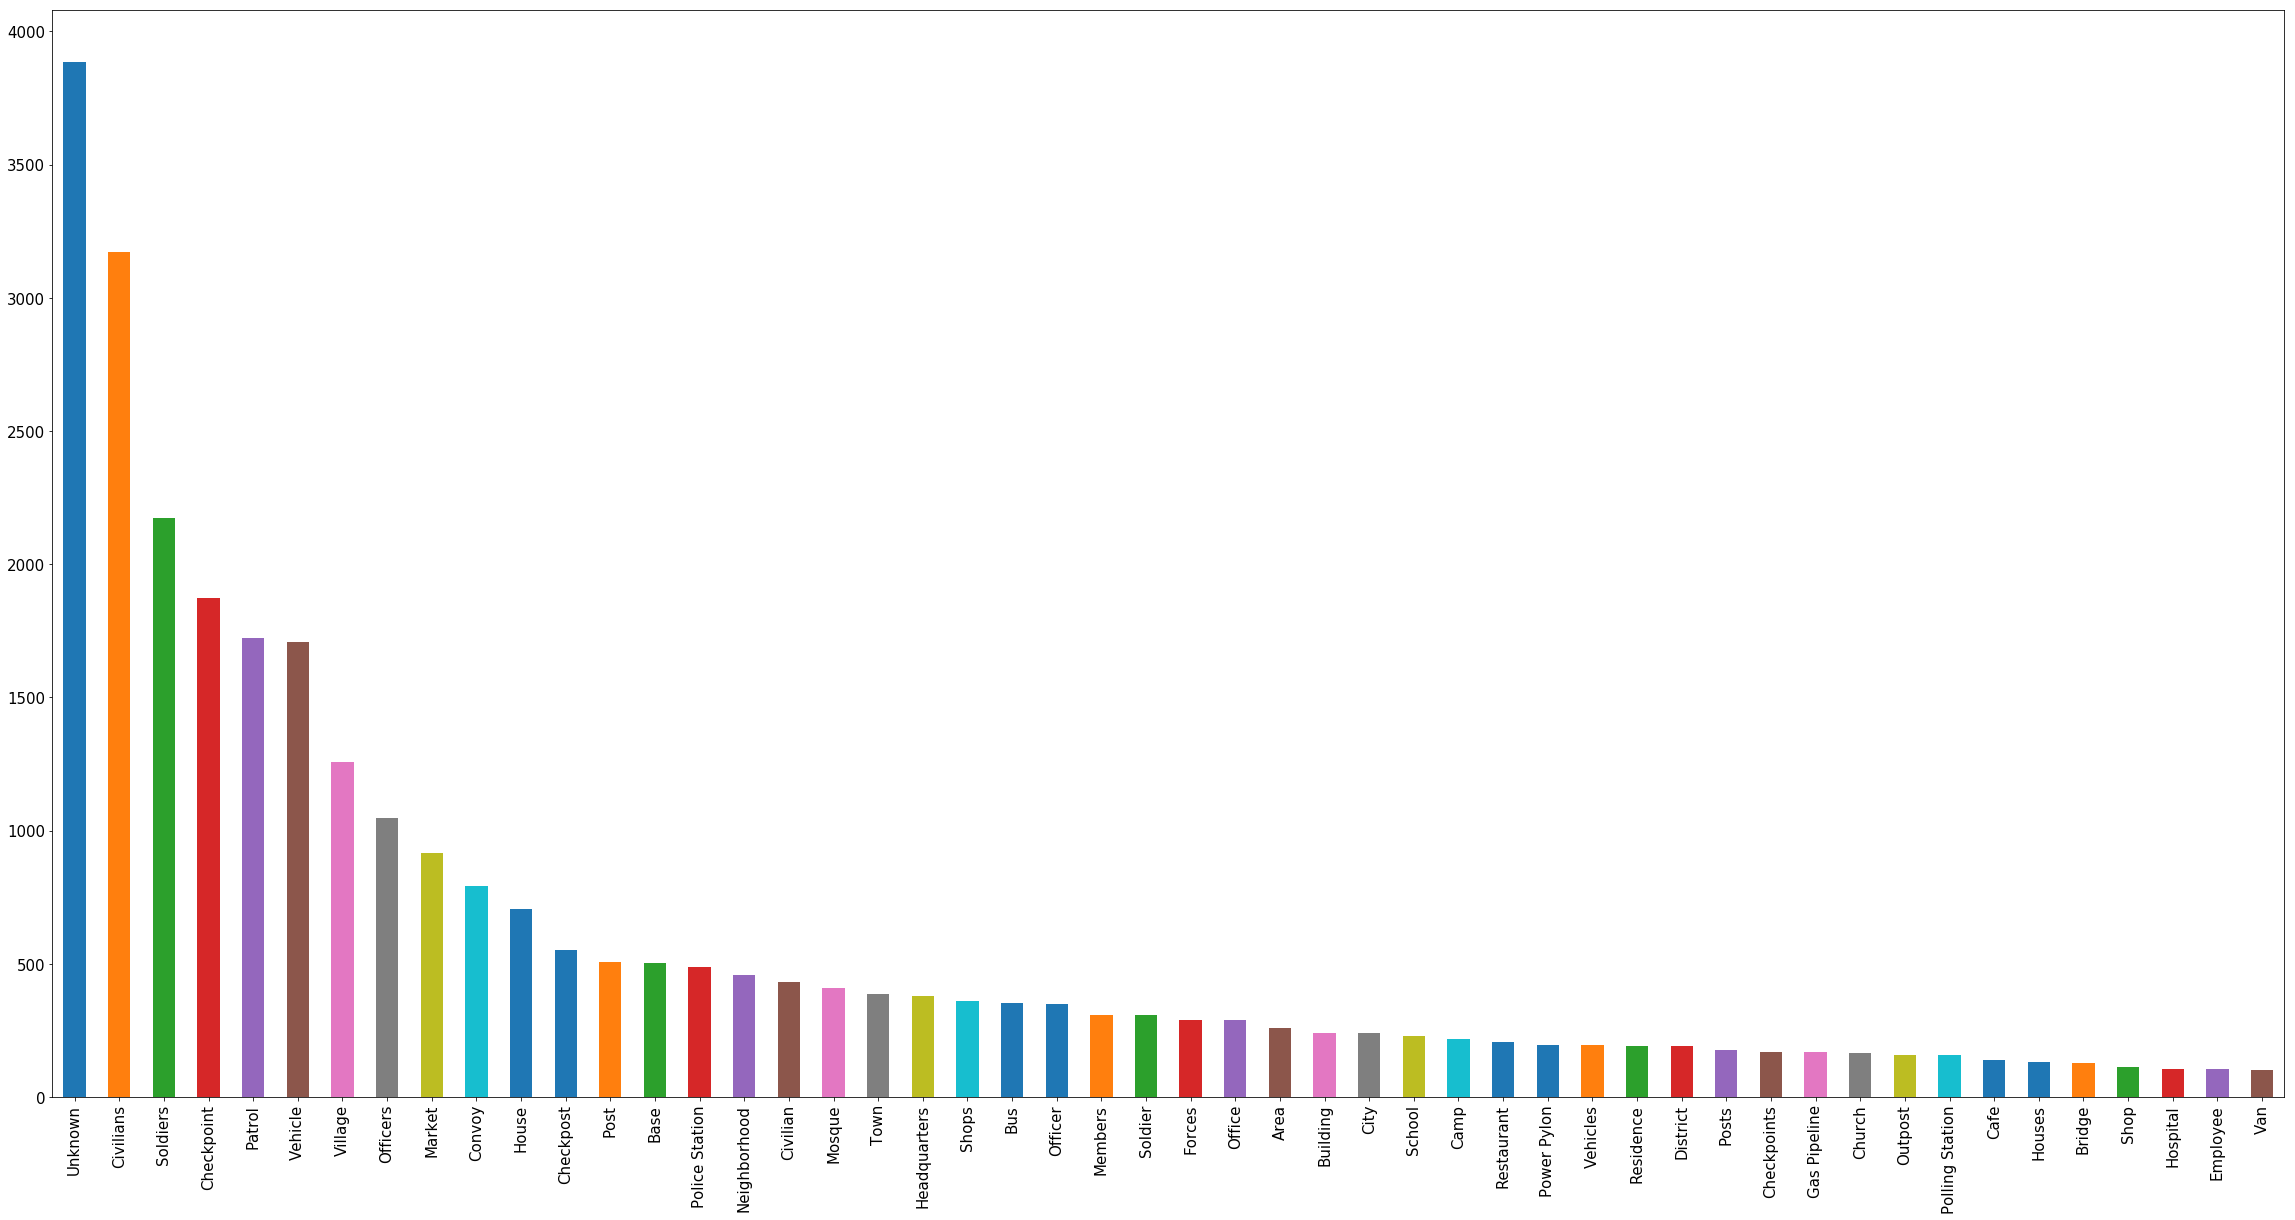

In [90]:
fig = plt.figure(figsize=(20,10)) 

targettop100 = terror['target1'].value_counts().head(50)
targettop100.plot(kind="bar", figsize=(40,20))

Wnioski:
1. Najliczeniejsza kategoria to "Unknown"
2. Ok 50 pierwszych kategorii ma ponad 100 wystąpień
3. Opis celu (kategoria) jest bardzo różnej granulacji - od bardzo ogólnych (Civilians, Soldiers), po takie wymieniające imię i nazwisko celu (Iraqi Liaison Officer: Amer al-Kaissy).

Decyzja:
Wrzućmy wszystko poniżej ok 100 wystąpień (pierwsze 50 pozycji) do kategorii "Other"

In [91]:
cele = list(terror['target1'].value_counts().head(50).keys())
terror.loc[~terror['target1'].isin(cele), 'target1'] = "Other"

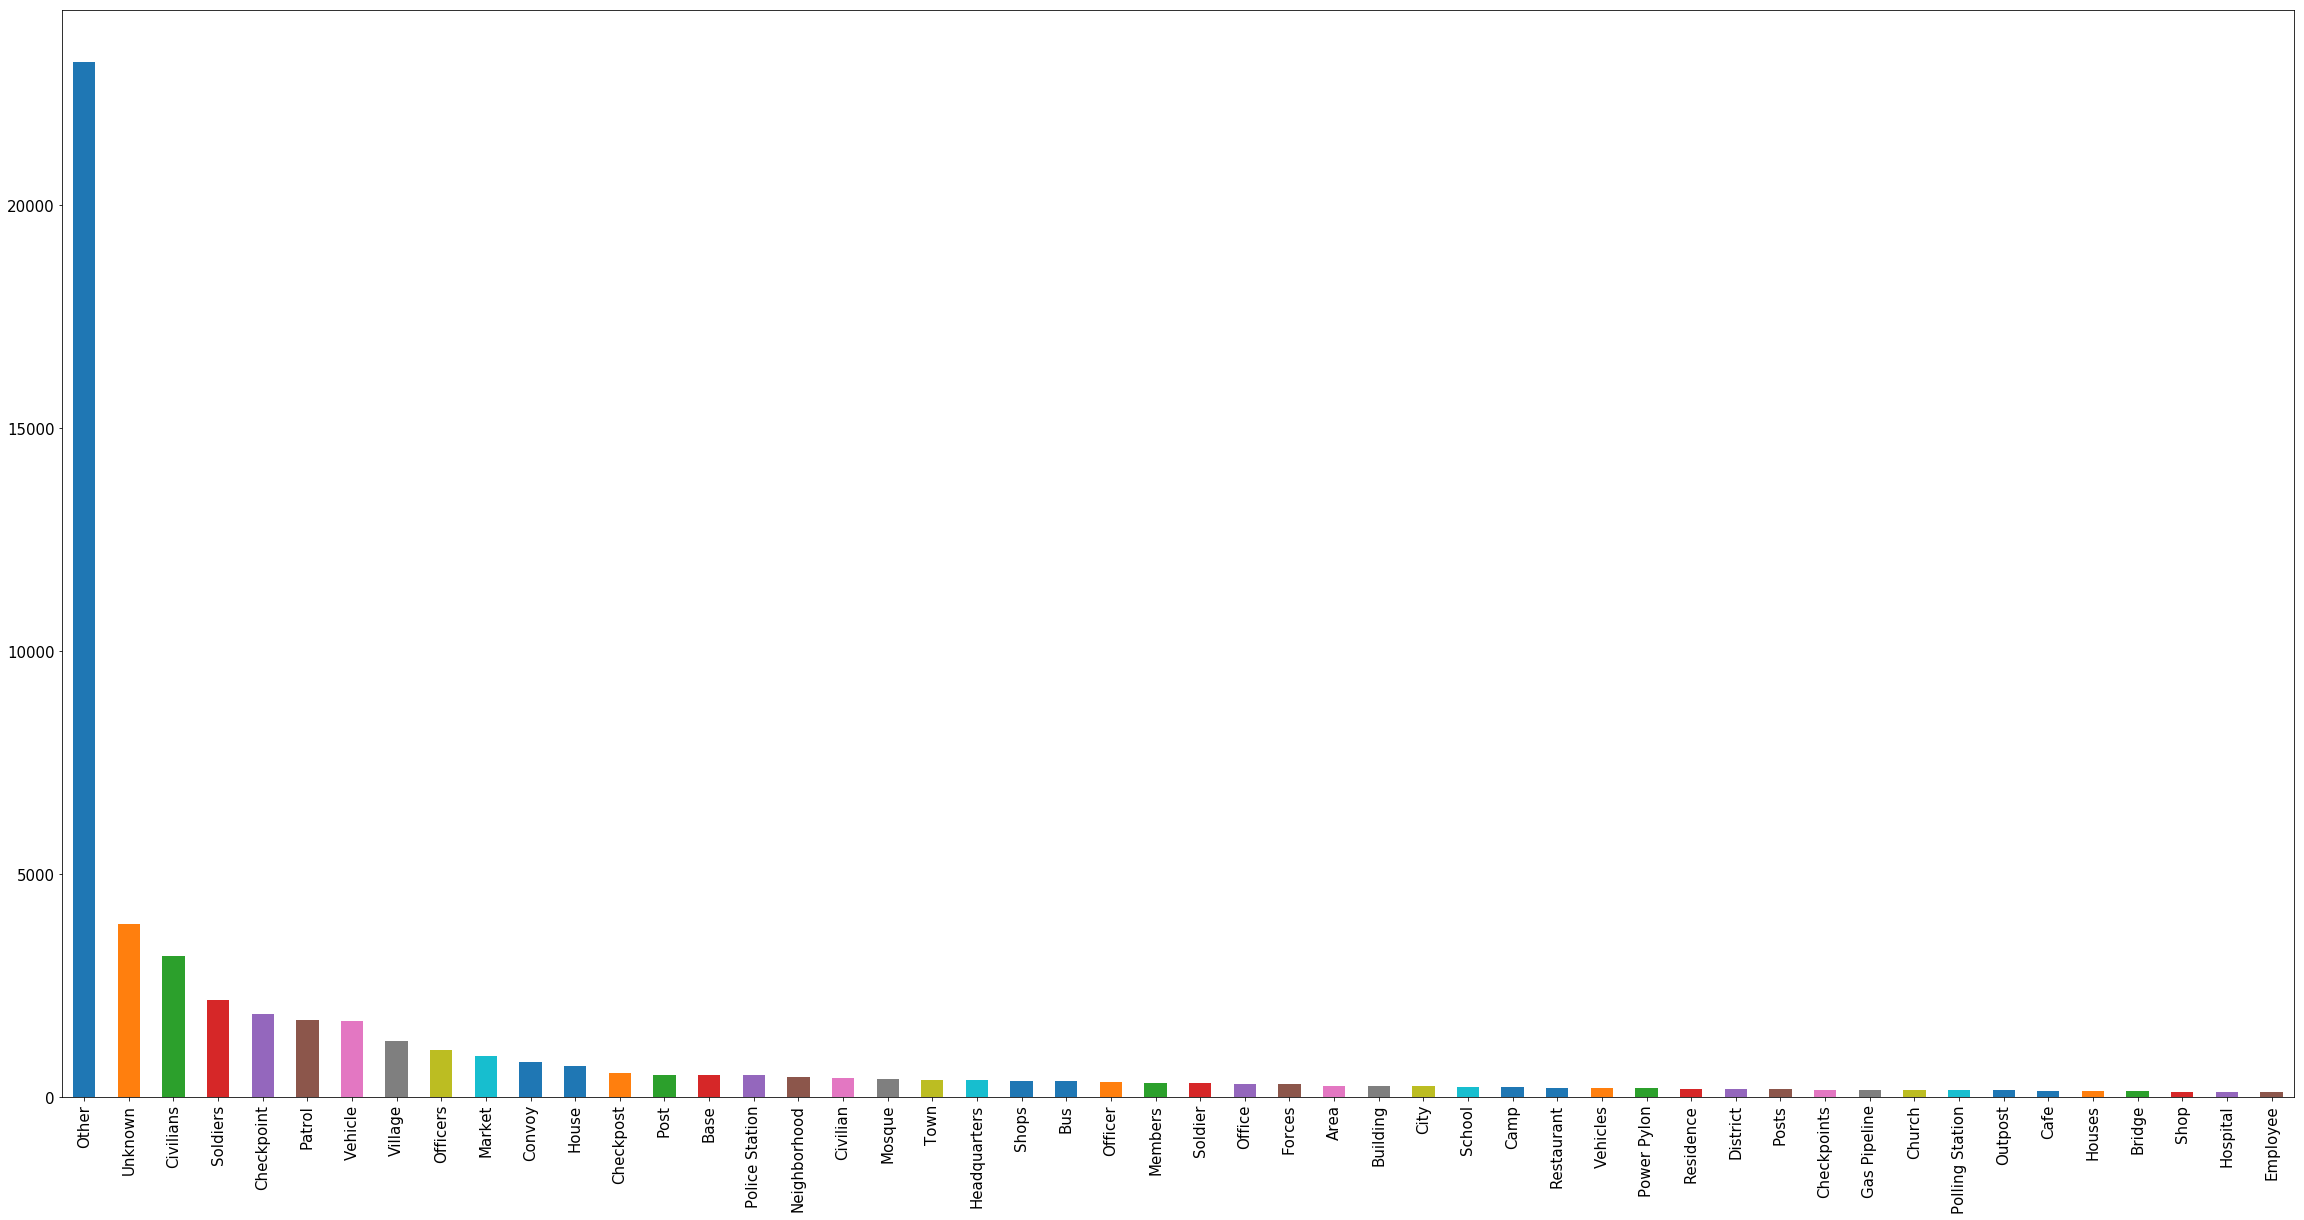

In [92]:
fig = plt.figure(figsize=(20,10)) 

targettop100 = terror['target1'].value_counts().head(50)
targettop100.plot(kind="bar", figsize=(40,20))

Dane niestety teraz są niezbalansowane (70% wartości to other lub unknown) ale w zamian nie mamy danej kategorycznej o tysiącach kategorii.




Kolejne kolumny do sprawdzenia (zredukowania liczby kategorii):

| KOLUMNA          	| UNIKALNYCH WARTOSCI 	| OPIS                          	|
|------------------	|---------------------	|-------------------------------	|
| targtype1_txt    	| 22                  	| Nie zmieniamy                 	|
| targsubtype1_txt 	| 110                 	| Za dużo kategorii             	|

Dla katgorii targtype1_txt przyjeliśmy, że nie musimy jej zmieniać (ograniczać kliczby kategorii) ale warto sprawdzic czy te dwie kolumny się nie dublują

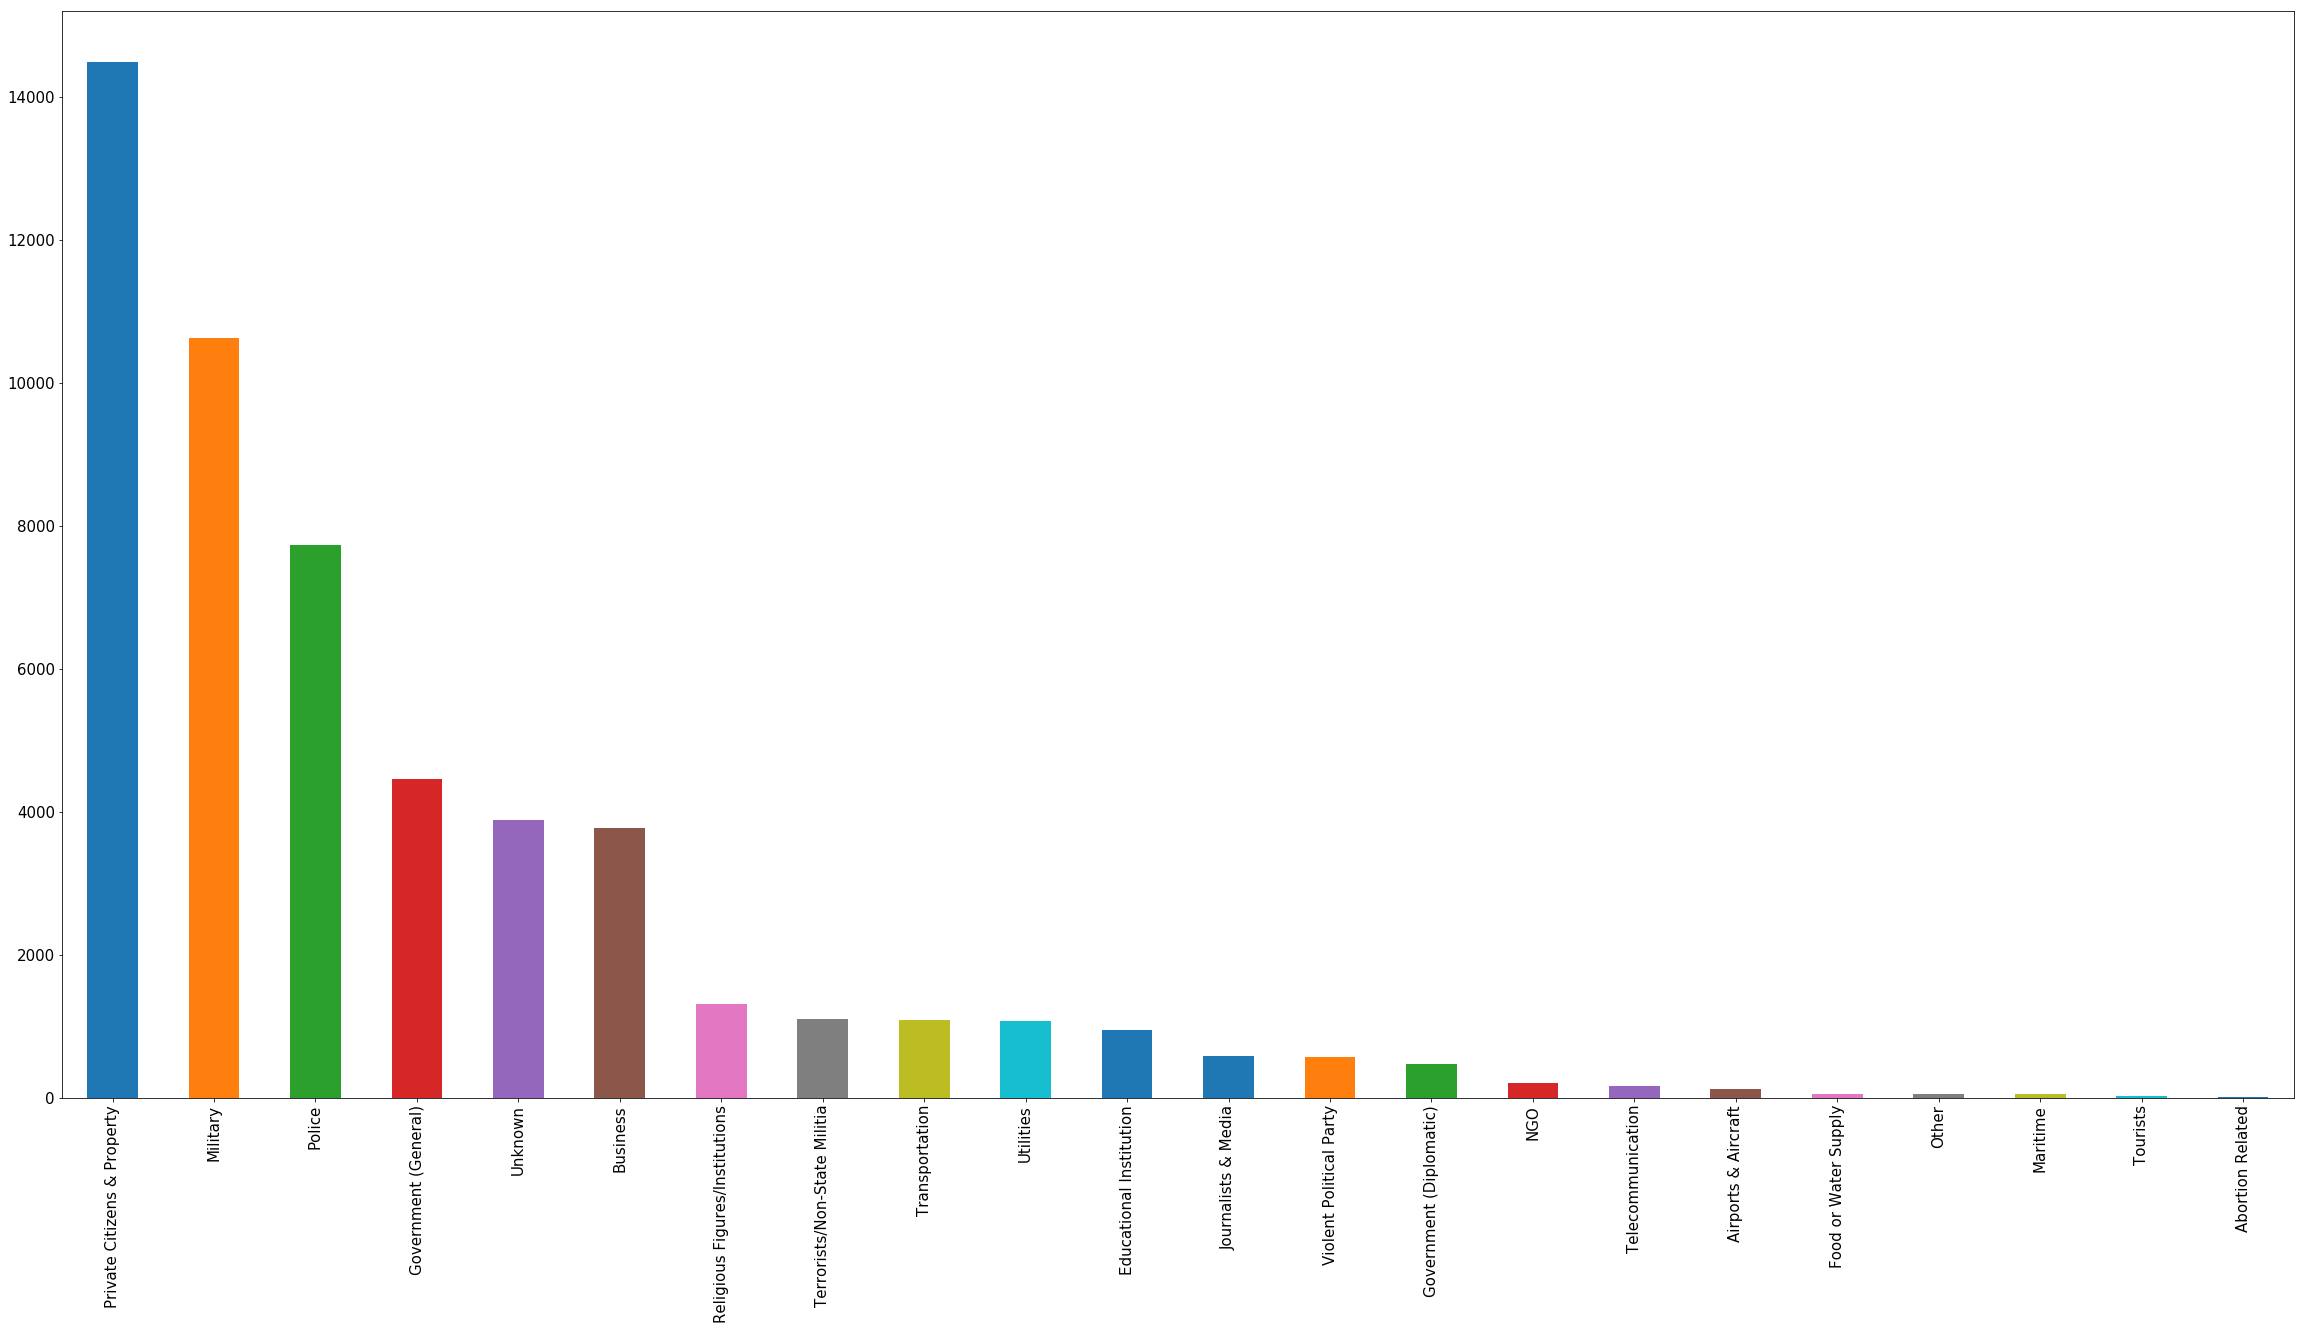

In [93]:
fig = plt.figure(figsize=(20,10)) 

targettop100 = terror['targtype1_txt'].value_counts()
targettop100.plot(kind="bar", figsize=(40,20))

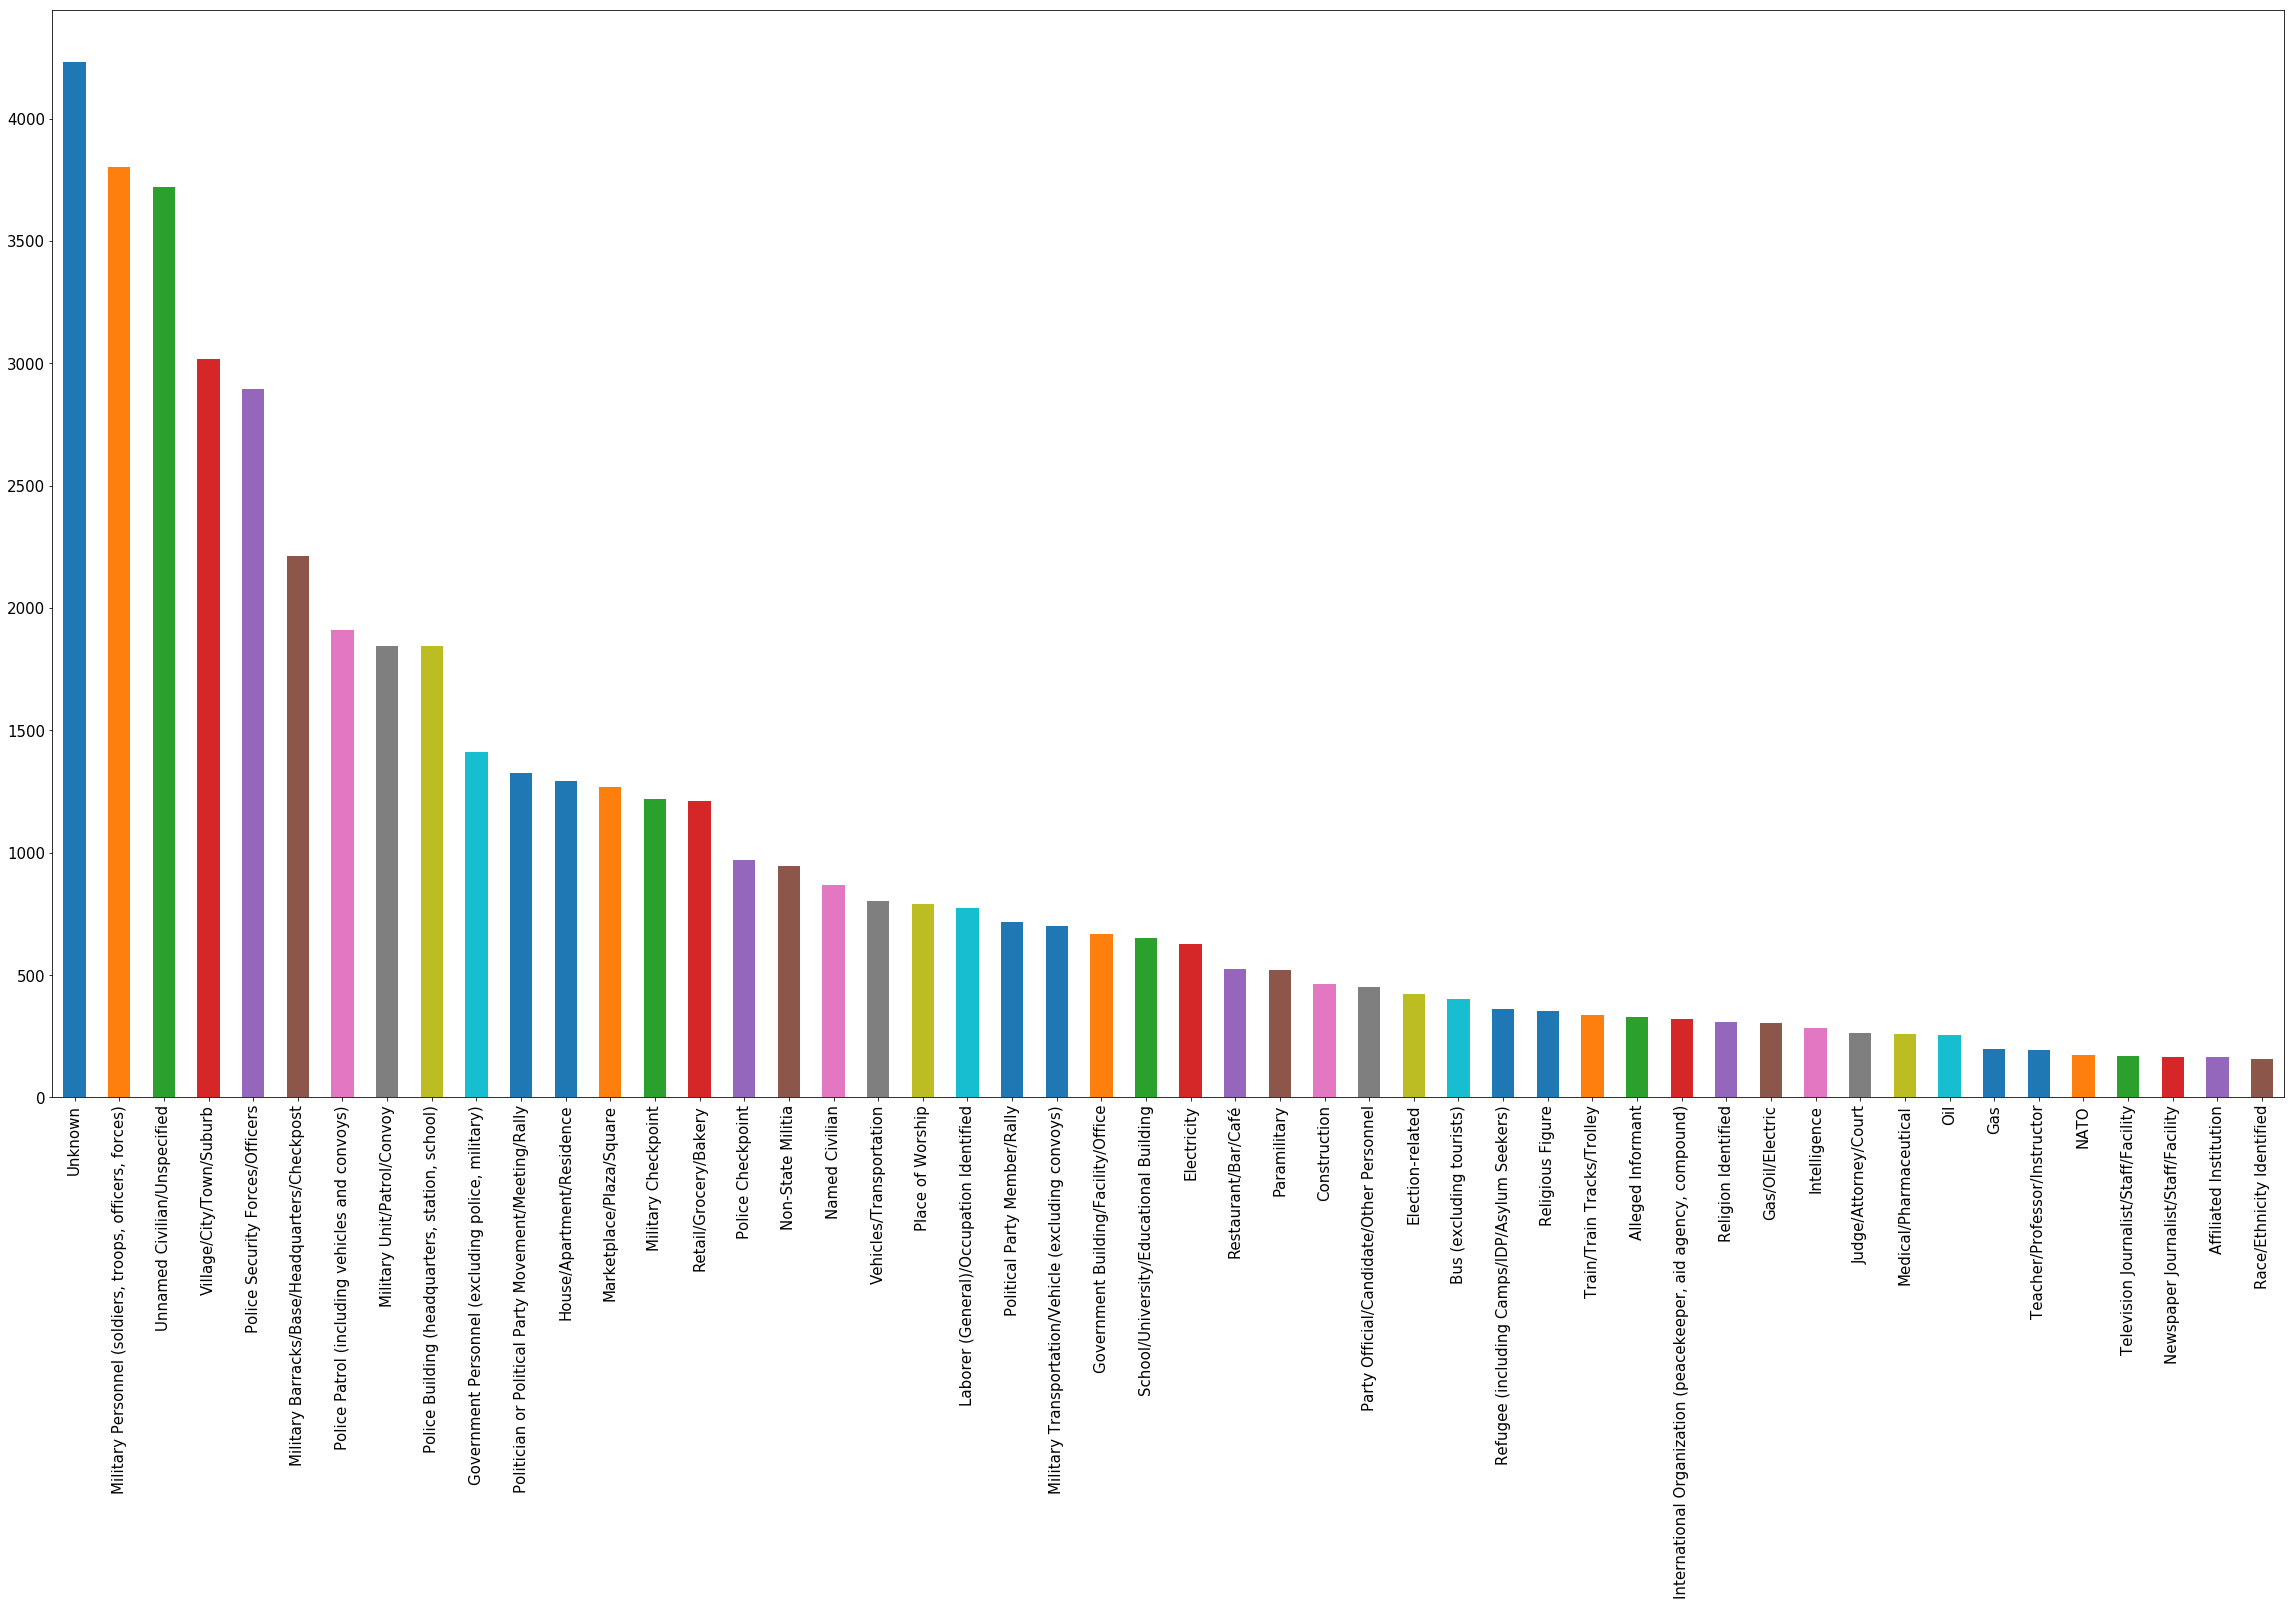

In [94]:
fig = plt.figure(figsize=(20,10)) 

targettop100 = terror['targsubtype1_txt'].value_counts().head(50)
targettop100.plot(kind="bar", figsize=(40,20))

Widać (zarówno z wykresów powyższych, jak i w dokumentacji - *Codebook.pdf* ), że zmienna **targetsubtype** to bardziej szczegółowe podzielenie kategorii **targettype**.
Dlatego możemy wykonać następujące czynności:
1. Usuwamy kategorię "targettype" - dane nadmiarowe
2. "Targetsubtype" redukujemy do 50 kategorii + "Other"

In [95]:
cele = list(terror['targsubtype1_txt'].value_counts().head(50).keys())
terror.loc[~terror['targsubtype1_txt'].isin(cele), 'targsubtype1_txt'] = "Other"
terror = terror.drop(['targtype1_txt'], axis=1)

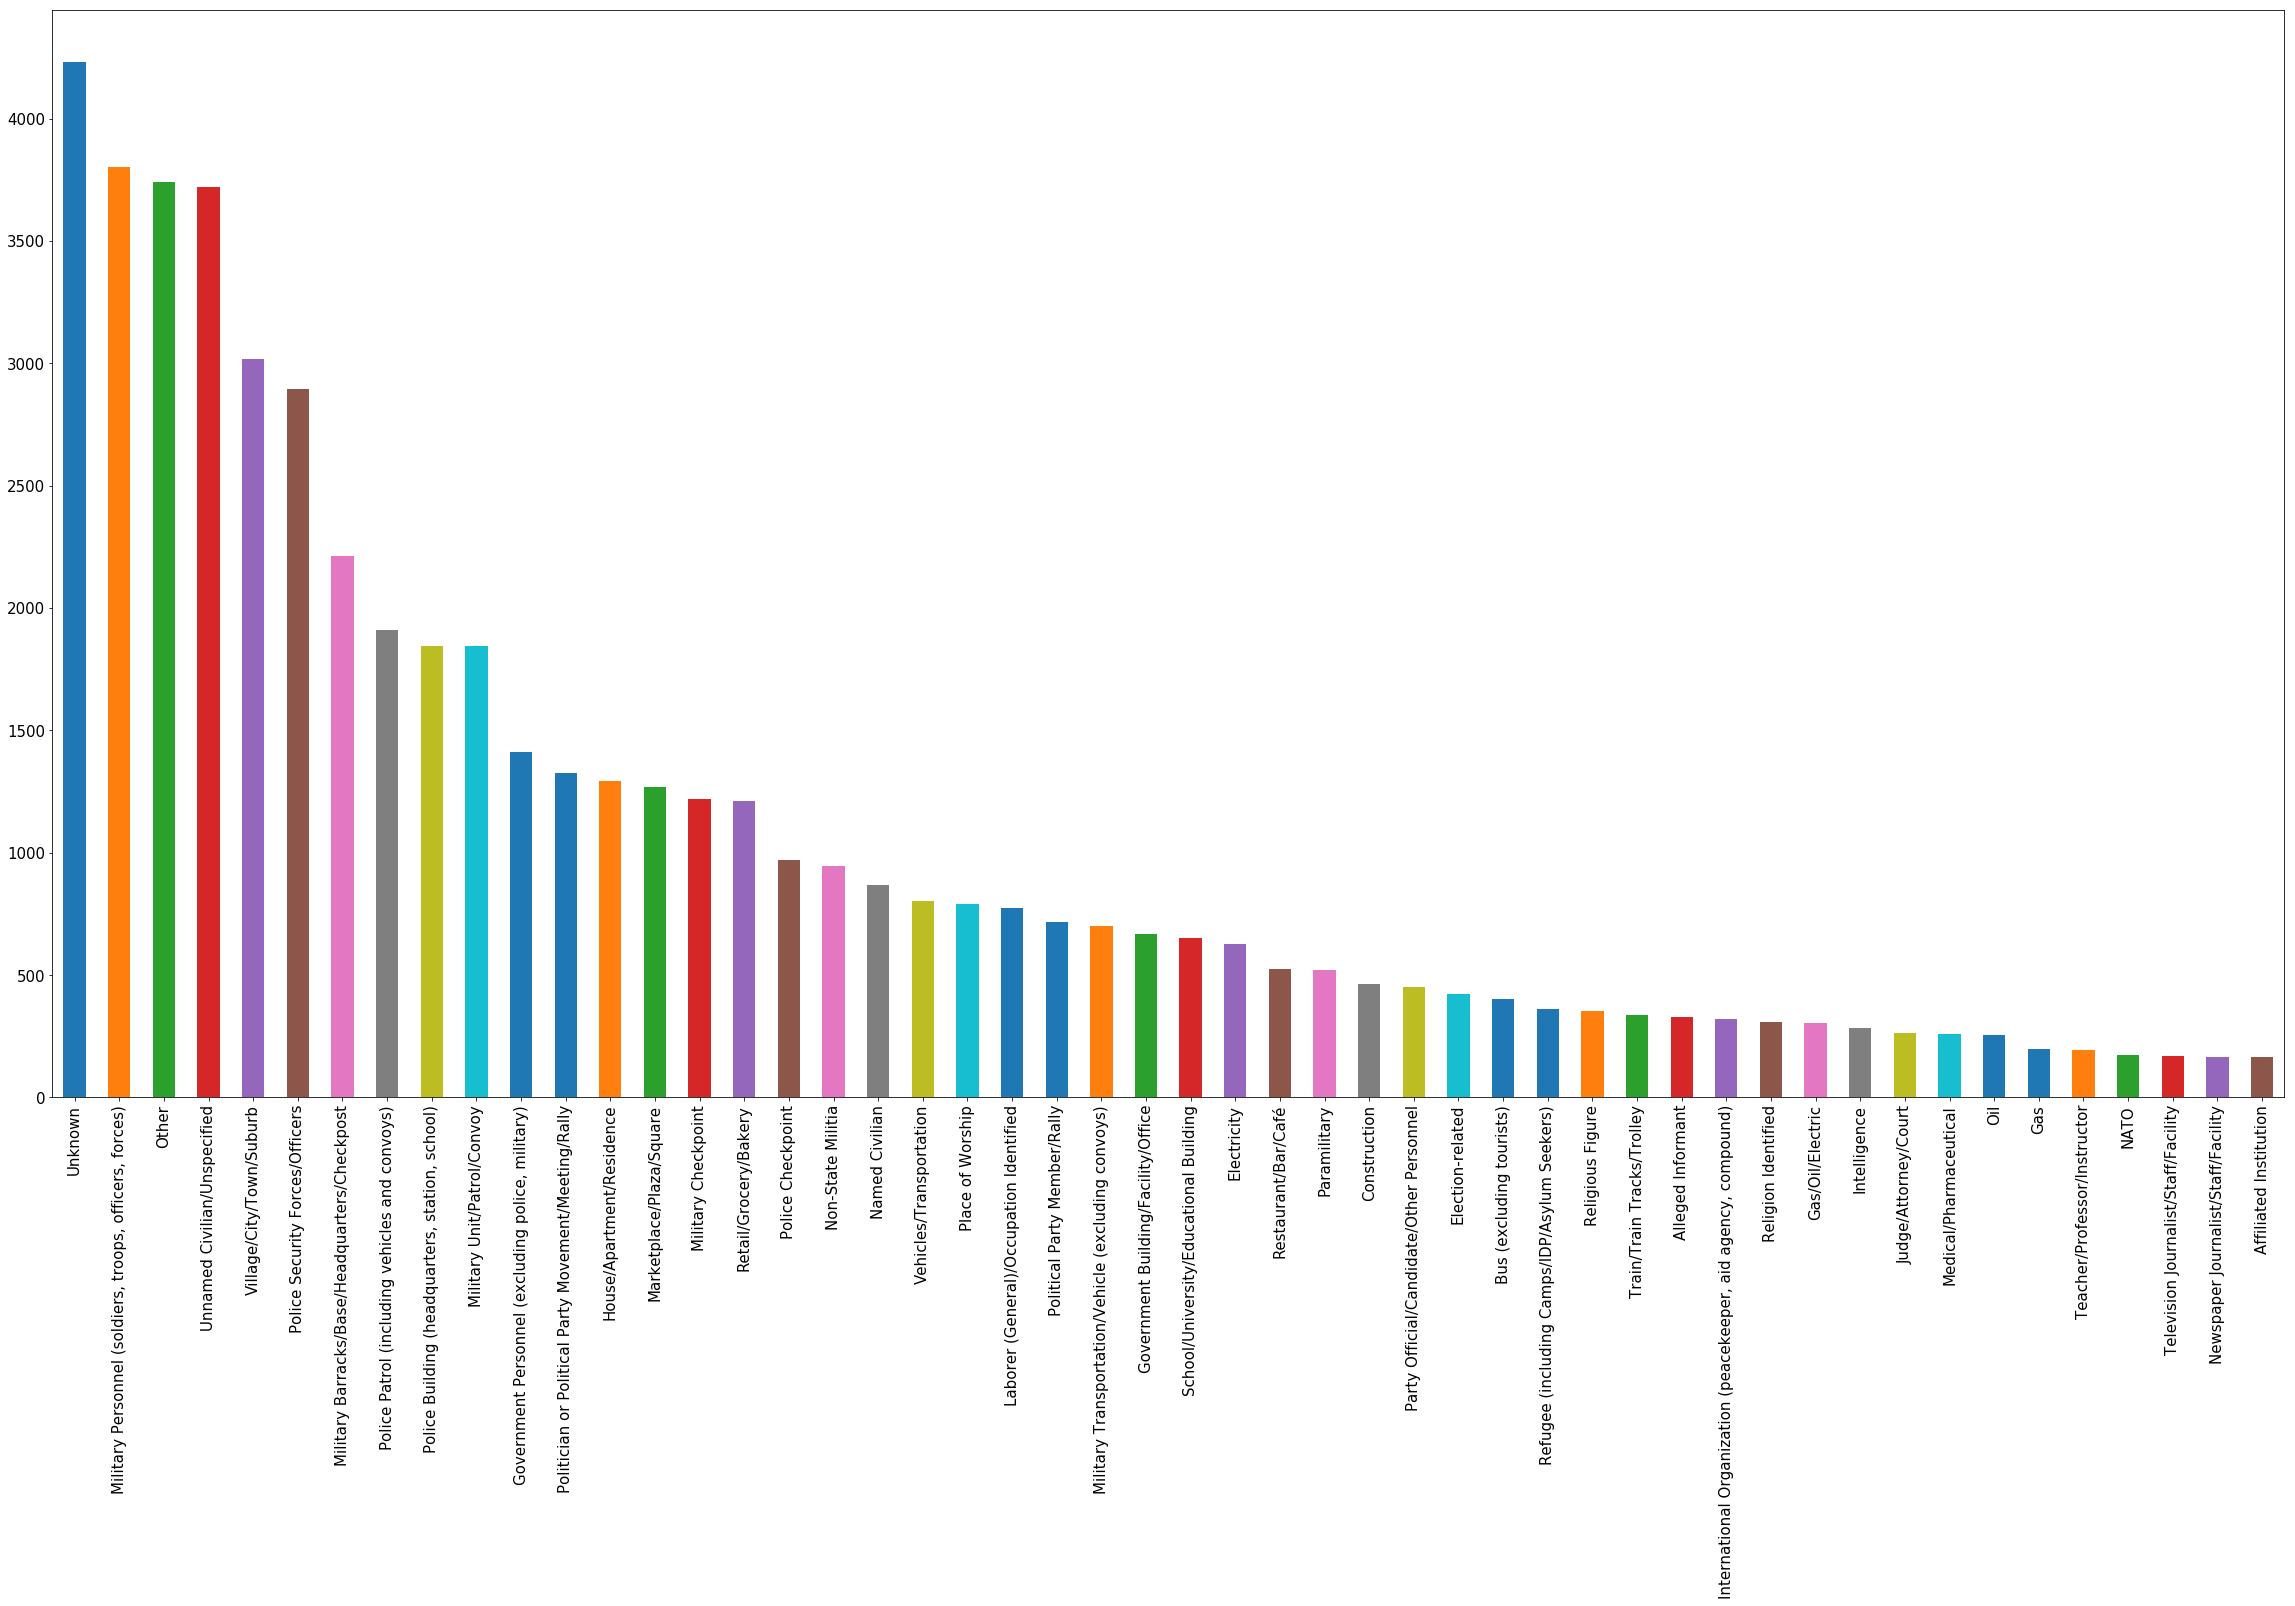

In [96]:
fig = plt.figure(figsize=(20,10)) 

targettop100 = terror['targsubtype1_txt'].value_counts().head(50)
targettop100.plot(kind="bar", figsize=(40,20))

Kolejne kolumny do sprawdzenia i korekty:

| KOLUMNA          	| UNIKALNYCH WARTOSCI 	| OPIS                          	|
|------------------	|---------------------	|-------------------------------	|
| weaptype1_txt    	| 10                  	| Nie zmieniamy                    	|
| weapsubtype1_txt 	| 31                  	| Za dużo kategorii               	|


Przyjmujemy podobne założenie (kolumna **weaptype1** jest "dublem" kolumny **weapsubtype1**) powoduje, że postępujemy tak jak w poprzednim przypadku ( **weaptype1** usuwamy a w pozostałej kolumnie ograniczamy liczbe kolumn)

In [97]:
terror = terror.drop(['weaptype1_txt'], axis=1)

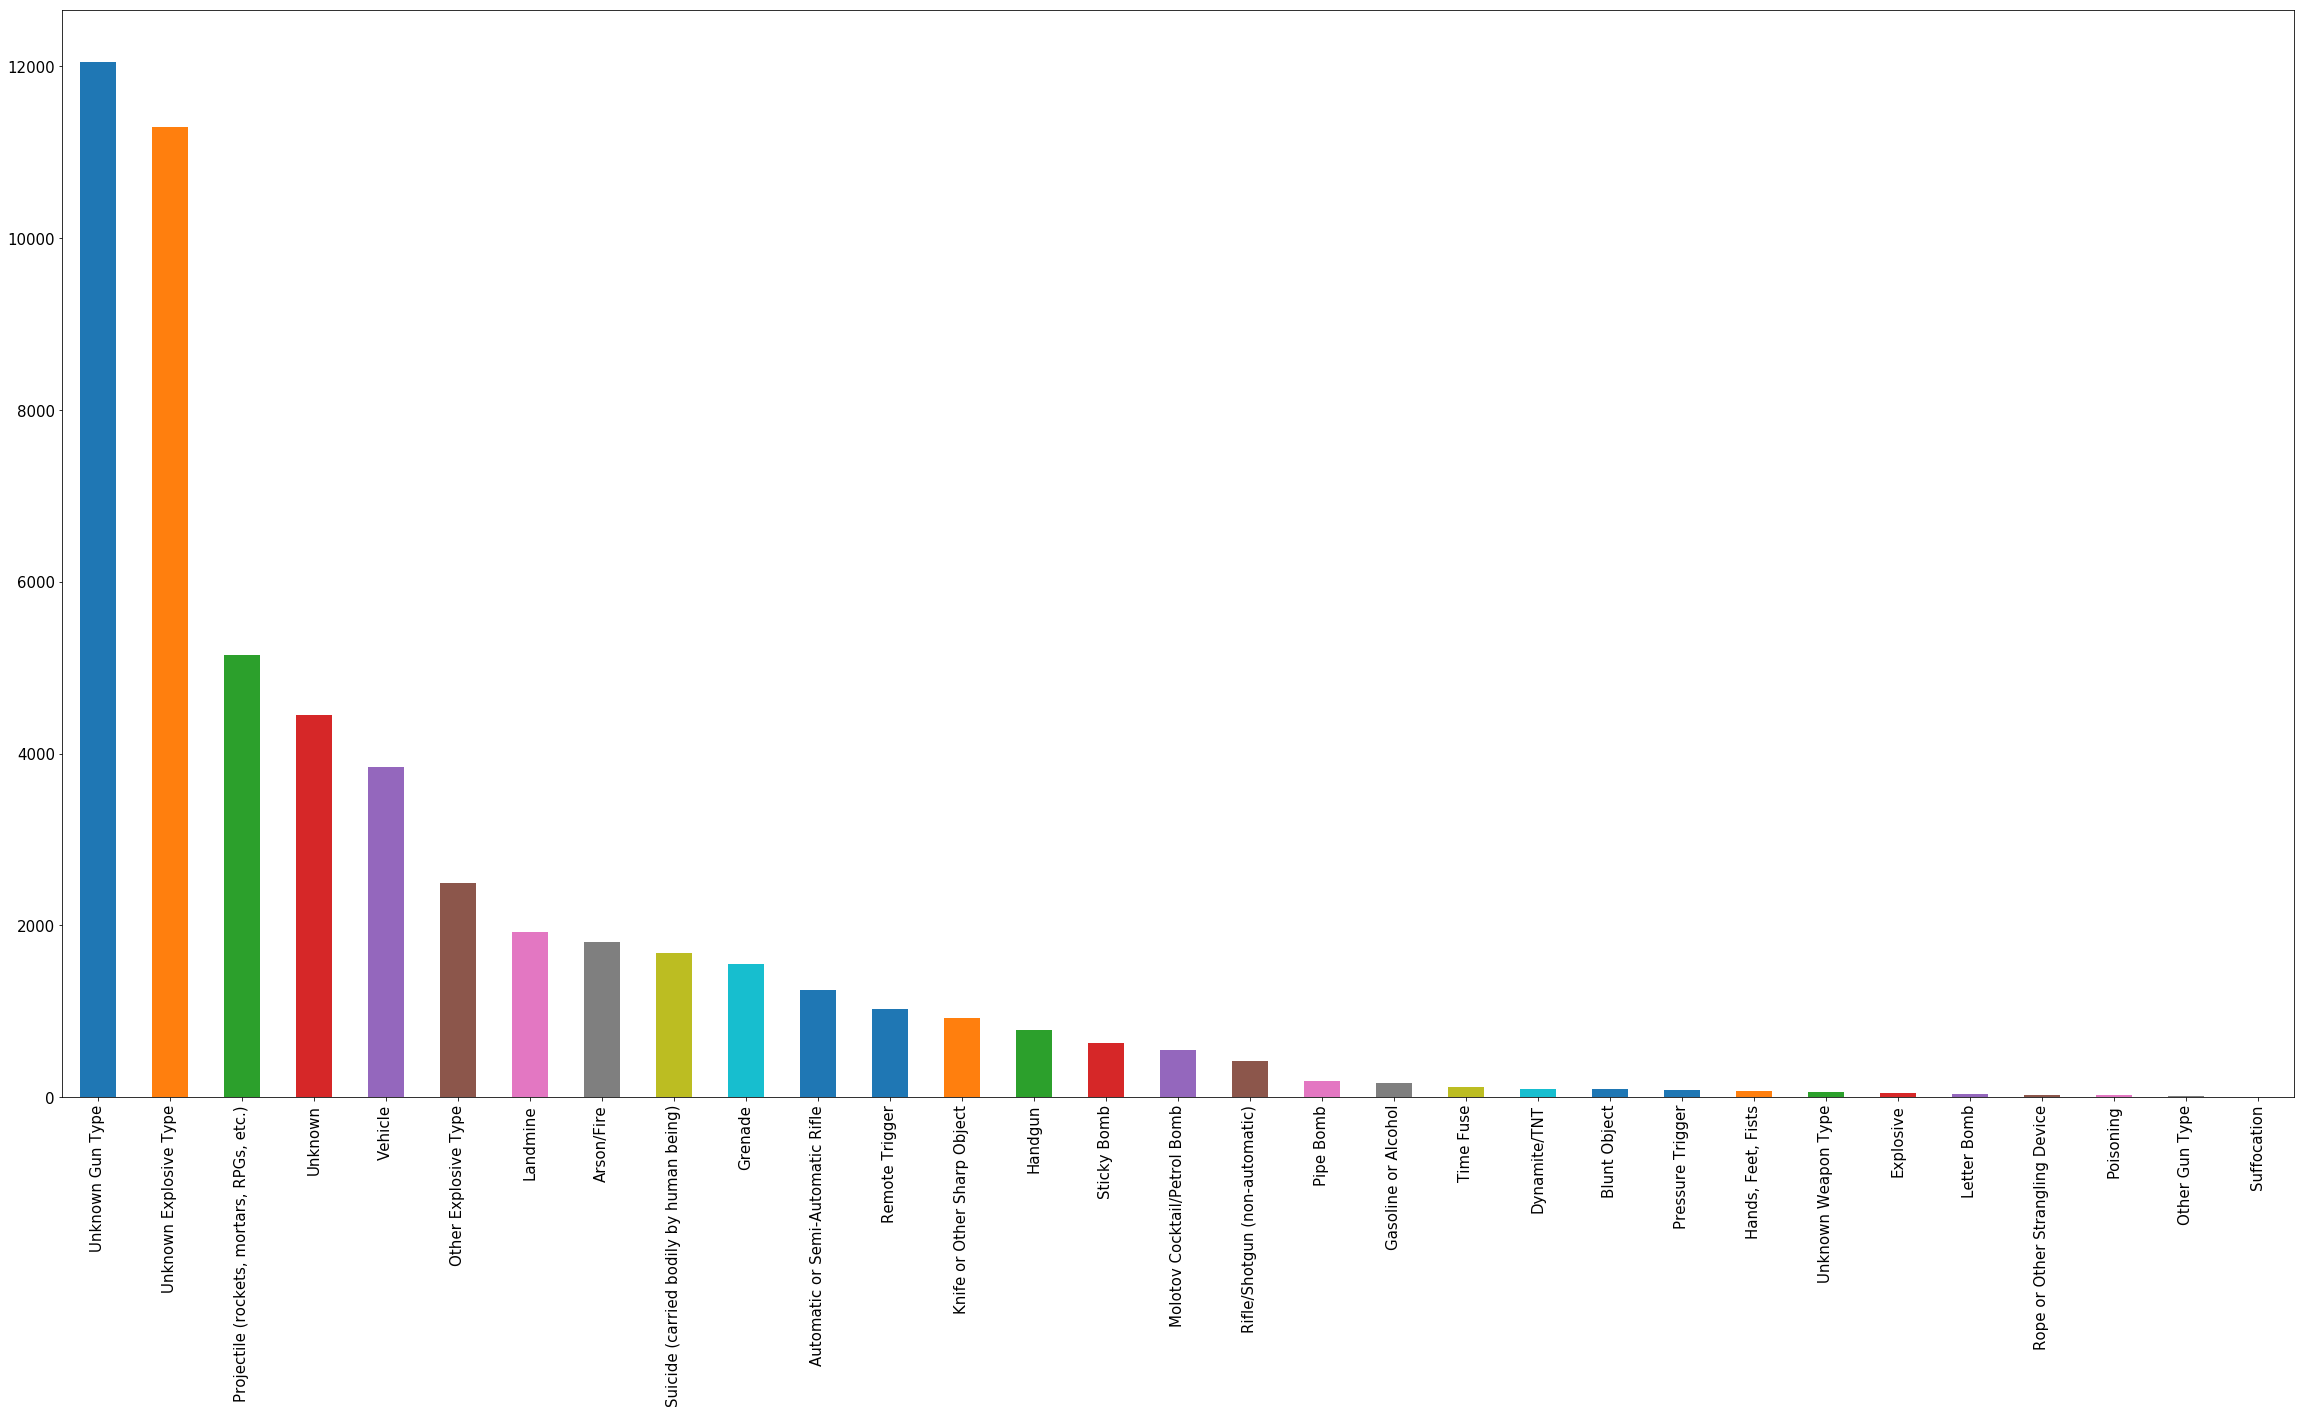

In [98]:
fig = plt.figure(figsize=(20,10)) 

targettop100 = terror['weapsubtype1_txt'].value_counts().head(50)
targettop100.plot(kind="bar", figsize=(40,20))

Mniej więcej po połowie (po 15 kateogriach sortowanych względem liczoności) ilość rekordów w każdej z kategorii mocno spada. Dlatego pozostałe kategorie wrzucamy w zbiór: "Other"

In [99]:
bron = list(terror['weapsubtype1_txt'].value_counts().head(15).keys())
terror.loc[~terror['weapsubtype1_txt'].isin(bron), 'weapsubtype1_txt'] = "Other"

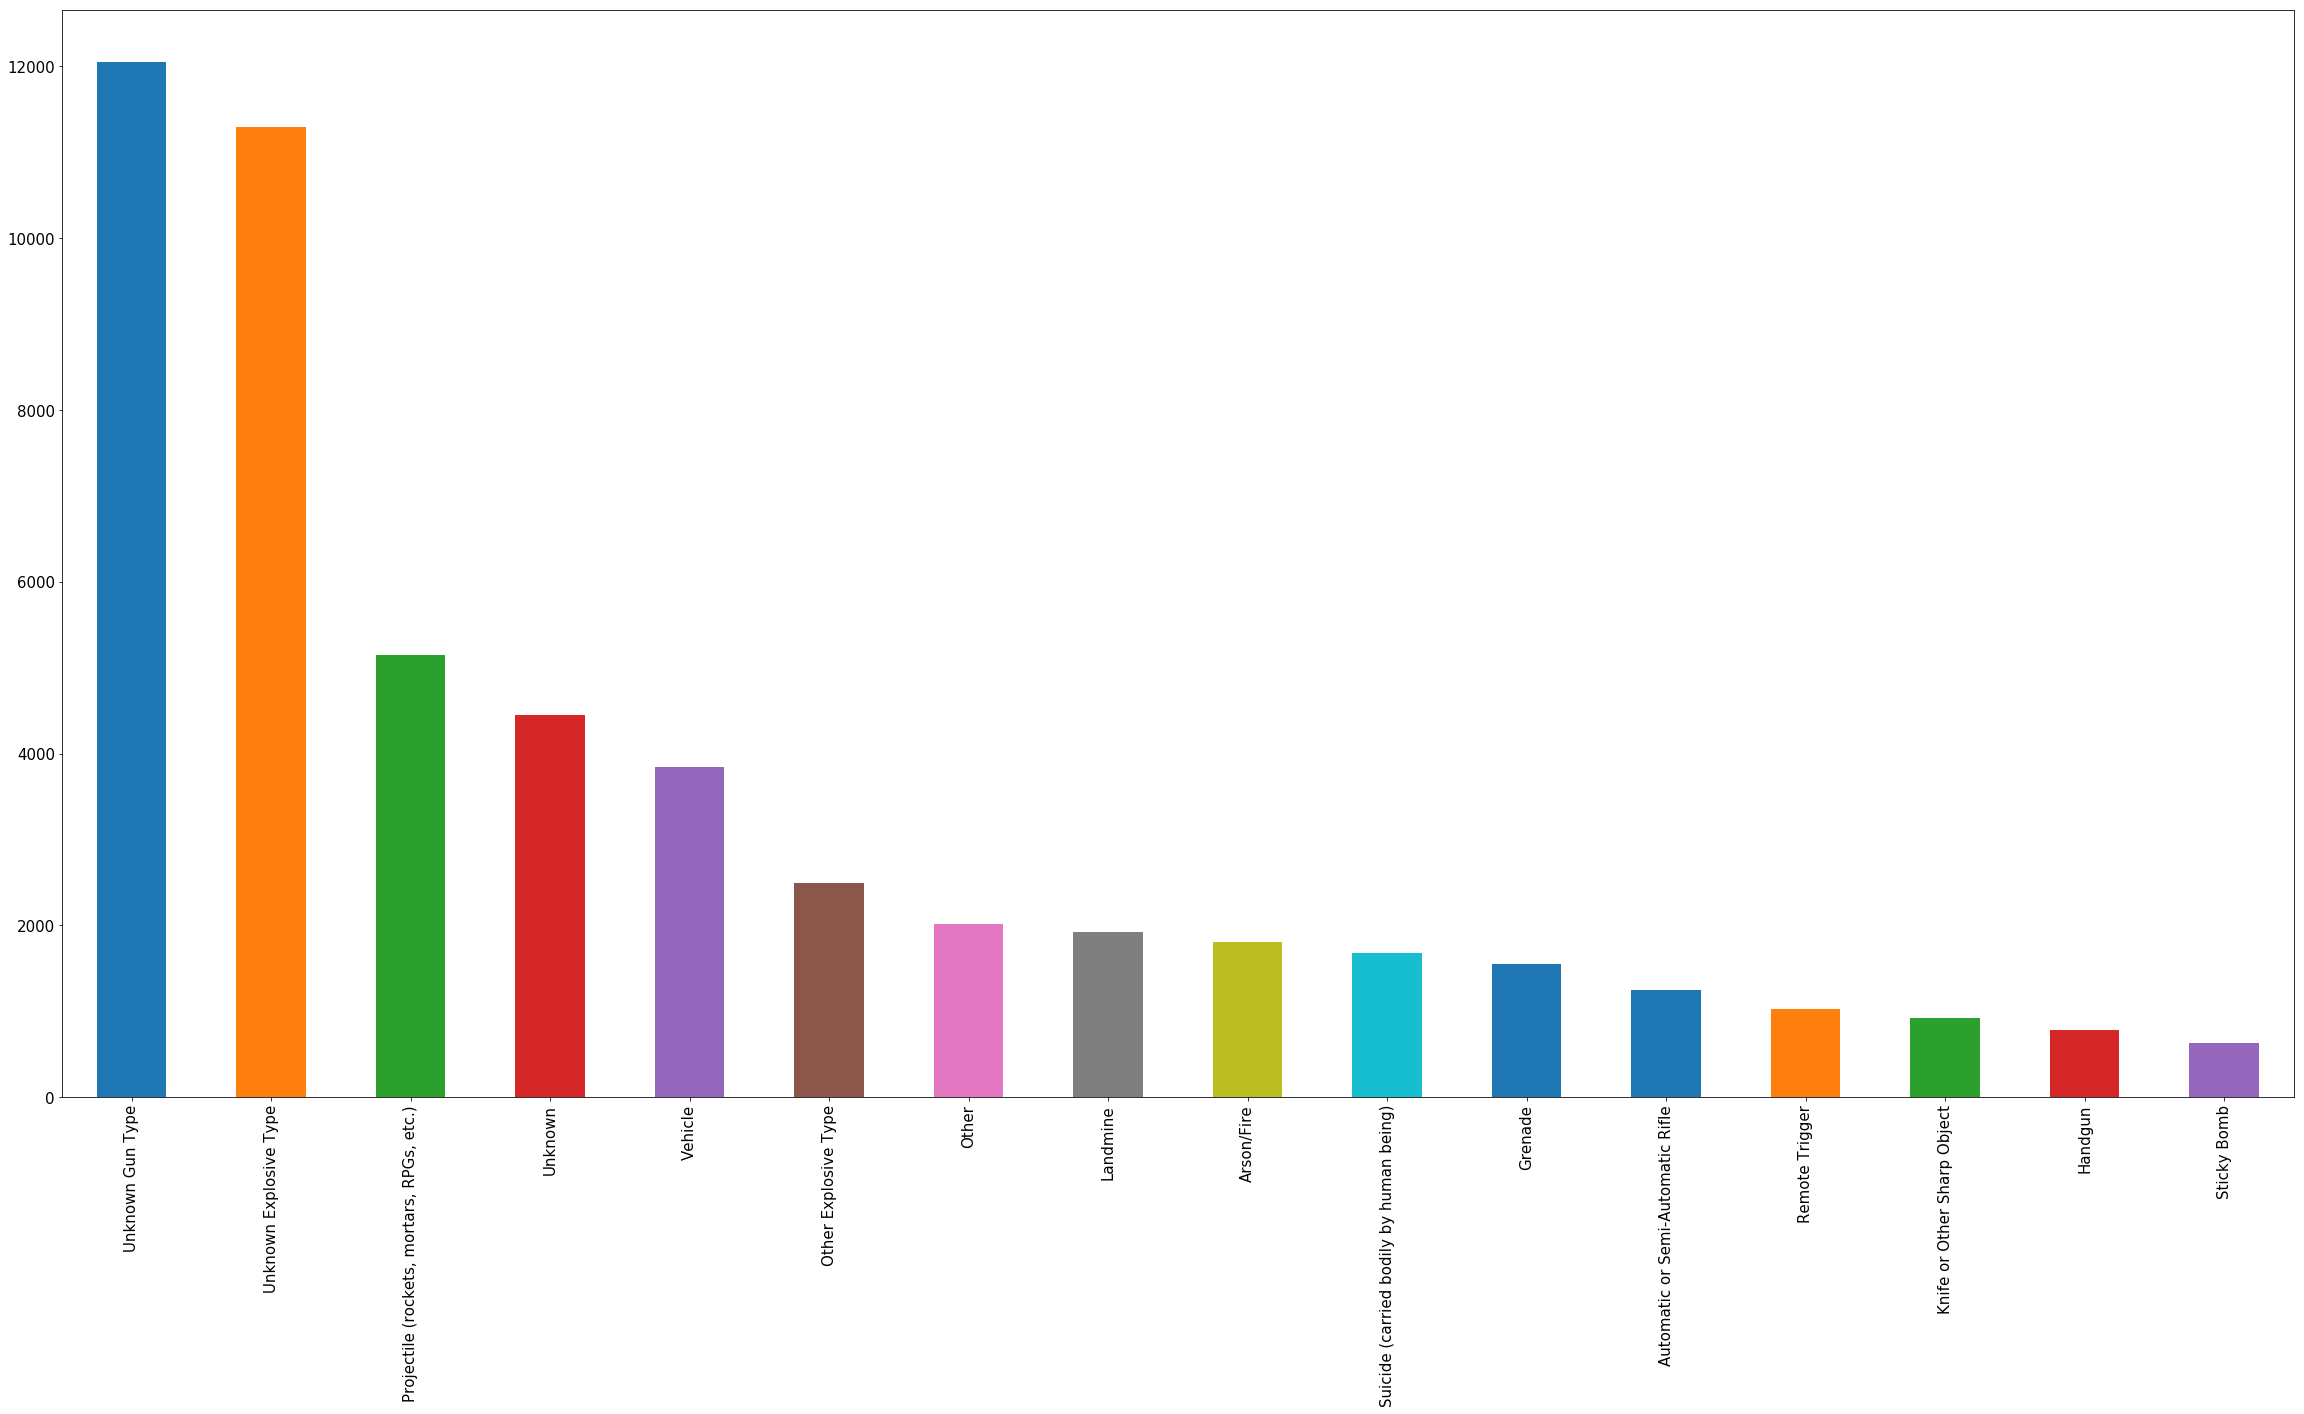

In [100]:
fig = plt.figure(figsize=(20,10)) 

targettop100 = terror['weapsubtype1_txt'].value_counts().head(50)
targettop100.plot(kind="bar", figsize=(40,20))

In [101]:
sprawdz_unikaty(terror)

 iyear		Unikalnych wartosci:4
 imonth		Unikalnych wartosci:12
 iday		Unikalnych wartosci:31
 extended		Unikalnych wartosci:2
 country_txt		Unikalnych wartosci:21
 region_txt		Unikalnych wartosci:12
 provstate		Unikalnych wartosci:21
 latitude		Unikalnych wartosci:23004
 longitude		Unikalnych wartosci:22823
 specificity		Unikalnych wartosci:4
 vicinity		Unikalnych wartosci:2
 suicide		Unikalnych wartosci:2
 attacktype1_txt		Unikalnych wartosci:9
 targsubtype1_txt		Unikalnych wartosci:51
 target1		Unikalnych wartosci:51
 weapsubtype1_txt		Unikalnych wartosci:16
 nkill		Unikalnych wartosci:153
 corp1_known		Unikalnych wartosci:2


Problem z kolumnami z dużą ilością kategorii został rozwiązany.
Powyżej 51 unikalnych wartości mają jedynie kolumny liczbowe (**latitude** i **longitude**) oraz zmienna objaśniana (**nkill**)

## 4.4 One hot encoding

Ostatnia rzecz do przygotowania przed rozpoczęciem trenowania to wykonanie "One hot encoding" dla zmiennych kategorycznych:

In [102]:
#tworzymy "dummy" zmienne
dummy_region = pd.get_dummies(terror['region_txt'], prefix="region:")
dummy_attack = pd.get_dummies(terror['attacktype1_txt'], prefix="attack:")
dummy_target = pd.get_dummies(terror['targsubtype1_txt'], prefix="target:")
dummy_weapon = pd.get_dummies(terror['weapsubtype1_txt'], prefix="weapon:")
dummy_state = pd.get_dummies(terror['provstate'], prefix="state:")
dummy_targ2 = pd.get_dummies(terror['target1'], prefix="targ2:")
dummy_country = pd.get_dummies(terror['country_txt'], prefix="country:")

#dolaczamy "dummy" zmienne do danych
terror = pd.concat([terror, dummy_region, dummy_attack, dummy_target, dummy_weapon, dummy_state, dummy_targ2, dummy_country], axis=1)

#usuwamy orginalne kolumny
terror= terror.drop(['region_txt','attacktype1_txt','targsubtype1_txt','weapsubtype1_txt', 'provstate', 'target1', 'country_txt'], axis=1)

## 4.5 Podsumowanie

In [103]:
terror.shape

(52853, 192)

* Dane przygotowane są przygotowane.
* Bardzo (relatywnie) dużo kolumn - prawie 200 z czego większość powstała poprzez "one hot encoding"
* Dość dużo cech uznałem za nieznane w momencie zaistnienia incydentu (ilość rannych, motywacja, jaka grupa wykonała atak itd...)

---

# 5. Wybór algorytmów i trenowanie modeli

Działania w tym etapie:

* 5.1 Przygotowanie środowiska
* 5.2 Podział danych i przygotowanie zmiennej opisywanej
* 5.3 Wybór modeli do trenowania
* 5.4 Wybór najlepszych hyper-parametrów 
* 5.5 Trenowanie modeli + ocena ich działania

## 5.1 Przygotowanie środowiska

Wgrywamy potrzebne biblioteki:

In [104]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer

# import pandas as pd
# import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

Definiujemy funkcje których będziemy używać do sprawdzania działania modeli:

In [105]:
def wyswietl_parametry(y_test, y_pred):
    precyzja = precision_score(y_test, y_pred)
    czulosc = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    dokladnosc = accuracy_score(y_test, y_pred)
    print(f'Dokładność modelu = {dokladnosc}')
    print("")
    print(f'Precyzja = {precyzja}')
    print(f'Czulosc = {czulosc}')
    print(f'F1 Score = {f1}')
    print("")
    print(f'Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    return dokladnosc, precyzja, czulosc, f1

In [106]:
def sprawdz_model(model,param_grid, X,y, verbose = 0):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, refit='accuracy', scoring=['accuracy','precision','recall','f1'], n_jobs=-1, verbose=3)
    grid_search.fit(X,y)
    if (verbose == 1):
        wartosci = ['params',
            'mean_fit_time',
            'mean_score_time',
            'mean_test_accuracy',
            'mean_train_accuracy',
            'mean_test_precision',
            'mean_train_precision',
            'mean_test_recall',
            'mean_train_recall',
            'mean_test_f1',
            'std_train_f1'
           ]
    else:
        wartosci = ['params',
            'mean_test_accuracy',
            'mean_test_precision',
            'mean_test_recall',
            'mean_test_f1',
           ]
    parametry = pd.DataFrame(grid_search.cv_results_)[wartosci]
    winner = parametry[parametry['params'] == grid_search.best_params_]
    return winner

## 5.2 Podział danych i przygotowanie zmiennej opisywanej

Dzielimy nasze dane na część opisującą (X) i opisywaną (y):

In [107]:
X = terror.drop(['nkill'], axis=1)
y = terror['nkill']

In [108]:
X.shape

(52853, 191)

In [109]:
y.shape

(52853,)

W cześci EDA (2.5) sprawdziliśmy zmienną **nkill** (liczba zabitych w ataku) i okazała się ona być mocno niezbilansowana. 
Dlatego zamiast przewidywać liczbę ofiar będziemy przewidywać czy w ataku były czy nie było zabitych.

W tym celu musimy zmienić naszą wartość opisywaną (z liczbowej, na binarną 0-brak ofiar, 1-zabici)

In [110]:
y = pd.DataFrame(np.where(y == 0.0, 0.0 , 1.0))

Zmienne opisujące i opisywane są gotowe.
Teraz dzielimy zbiór na dane treningowe i testowe:

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42282, 191)
(10571, 191)
(42282, 1)
(10571, 1)


Przy trenowaniu modeli otrzymywaliśmy ostrzeżenia związane z niezgodnością typów dla zmiennej y.
Rozwiązanie to wykorzystanie funkcji squeeze():

In [113]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

## 5.3 Wybór modeli do trenowania

Wykorzystamy następujące modele:

1. KNN
2. Naive Bayes
3. Drzewo Decyzyjne
4. Regresja Logistyczna
5. Random Forest
6. XGBoost

Pierwsze cztery to relatywnie proste modele kategoryzujące.
Random Forest i XGBoost to tzw: modele uczenia zespołowego (ensemble learning).

* **Random Forest** dzieli zbiór treningowy oraz zbiór cech (features) na kilka grup i trenuje każdą z nich osobno. Pozwala to wykorzystać tzw: "mądrość tłumu" czyli efekt polegający na tym że kilka słabszych predyktorów działających razem da lepszy rezultat niż jeden "porządny".
* **XGBoost** to algortym wykorzystujacy tzw: boosting - kilka klasyfikatorów łączy się w jeden przy czym każdy koleny poprawia wynik poprzedniego

## 5.4 Uczenie modeli (Wybór hyper-parametrów)

Każdy z modeli sprawdzimy dla grupy hyperparametów.

Wykorzystamy do tego celu napisaną funkcję sprawdz_model(). Funkcja ta opiera się o GridSearchCV a zwraca parametry dla modelu o najwyższej dokładności:

Oprócz samych hyperparametrów zwracane są też następujace metryki:

* accuracy
* precision
* recall
* f1

Przy trenowaniu wykonywany jest też podział na część testową i walidacyjną i wykonywana kroswalidacja ( cv=4)

In [114]:
podsumowanie = pd.DataFrame()

In [115]:
czy_trenowac = True

## K-Nearnest neighbours

In [116]:
if czy_trenowac:
    model = KNeighborsClassifier()
    param_grid = { 'n_neighbors': [3, 4, 5, 6]}
    wynik_knn = sprawdz_model(model,param_grid,X_train,y_train)

    wynik_knn.insert(0,"algoritm","KNN")
    podsumowanie = podsumowanie.append(wynik_knn)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed:  1.6min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:  3.1min remaining:   42.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  3.2min finished


## Naive Bayes

In [117]:
if czy_trenowac:
    model = MultinomialNB()
    param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10], "fit_prior": [False, True]}
    wynik_nb = sprawdz_model(model, param_grid, X_train ,y_train)

    wynik_nb.insert(0,"algoritm","Naive Bayes")
    podsumowanie = podsumowanie.append(wynik_nb)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.7s finished


## Drzewo decyzyjne

In [118]:
if czy_trenowac:
    model = DecisionTreeClassifier()
    param_grid = {"criterion": ["gini", "entropy"], "min_samples_split": [2, 10, 100, 200], "max_depth": [None, 2, 10, 100, 200]} 
    wynik_tree = sprawdz_model(model,param_grid, X_train, y_train)

    wynik_tree.insert(0,"algoritm","Decision Tree")
    podsumowanie = podsumowanie.append(wynik_tree)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   35.1s finished


## Regresja logistyczna

In [119]:
if czy_trenowac:
    model = LogisticRegression()
    param_grid = {"penalty": ["l1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10]}
    wynik_reg = sprawdz_model(model,param_grid, X_train, y_train)

    wynik_reg.insert(0,"algoritm","Logistic Regression")
    podsumowanie = podsumowanie.append(wynik_reg)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   52.9s finished


## Las losowy

In [120]:
if czy_trenowac:
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier())
    param_grid = {"max_samples" : [0.3, 0.5, 0.7, 0.9], "max_features" : [0.5, 0.7, 0.9], "bootstrap" : [False, True], "n_estimators" : [5, 10, 20, 50]}
    wynik_forest = sprawdz_model(model,param_grid, X_train, y_train)

    wynik_forest.insert(0,"algoritm","Random Forest")
    podsumowanie = podsumowanie.append(wynik_forest)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed: 18.5min finished


## XGBoost Classifier

In [121]:
if czy_trenowac:
    model = XGBClassifier()
    param_grid = {"max_depth" : [3, 5, 7] , "learning_rate" : [0.01 , 0.1, 1], "n_estimators" : [10, 50, 100, 200], "booster" : ["gbtree" , "gblinear" , "dart"] }
    wynik_xgb = sprawdz_model(model,param_grid, X_train, y_train)

    wynik_xgb.insert(0,"algoritm","XGBoost")
    podsumowanie = podsumowanie.append(wynik_xgb)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\Wojtek\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Wojtek\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Wojtek\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Wojtek\Anaconda3\l

## Podsumowanie

In [122]:
podsumowanie.set_index('algoritm', inplace=True)
podsumowanie

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
algoritm,,,,,
KNN,{'n_neighbors': 5},0.721323,0.730830,0.756173,0.743256
Naive Bayes,"{'alpha': 1, 'fit_prior': True}",0.747481,0.749291,0.791639,0.769857
Decision Tree,"{'criterion': 'entropy', 'max_depth': 200, 'min_samples_split': 100}",0.778393,0.784786,0.805559,0.795023
Logistic Regression,"{'C': 10, 'penalty': 'l1'}",0.777423,0.767357,0.836370,0.800365
Random Forest,"{'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 50}",0.808264,0.801737,0.851088,0.825662
XGBoost,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}",0.800270,0.792809,0.847010,0.818999


## 5.5 Porównanie modeli na danych testowych

Po poprzednim etapie otrzymaliśmy najlepsze hyperparametry dla wybranych modeli.

Teraz jeszcze raz wyszkolimy modele na tych hyperparametrach oraz na pełnym zestawie danych treningowych, a następnie sprawdzimy ich predycje na zestawie testowych (który nie był wogóle uzywany)

In [123]:
model_knn = KNeighborsClassifier(n_neighbors= 5)
model_nb = MultinomialNB(alpha= 1, fit_prior= True)
model_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 200, min_samples_split= 100)
model_reg = LogisticRegression(C= 10, penalty= 'l1')
model_xgb = XGBClassifier(booster= 'gbtree', learning_rate= 0.1, max_depth= 7, n_estimators= 200)
model_forest = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap= True, max_features= 0.5, max_samples= 0.7, n_estimators= 50)

In [124]:
print("Trenuję KNN")
model_knn.fit(X_train, y_train)
print("Trenuję NB")
model_nb.fit(X_train, y_train)
print("Trenuję Dec.Tree")
model_tree.fit(X_train, y_train)
print("Trenuję Log.Regresion")
model_reg.fit(X_train, y_train)
print("Trenuję XGB")
model_xgb.fit(X_train, y_train)
print("Trenuję Las")
model_forest.fit(X_train, y_train)

Trenuję KNN
Trenuję NB
Trenuję Dec.Tree
Trenuję Log.Regresion
Trenuję XGB
Trenuję Las


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.7, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [125]:
y_pred_knn = model_knn.predict(X_test)
y_pred_nb = model_nb.predict(X_test)
y_pred_tree = model_tree.predict(X_test)
y_pred_reg = model_reg.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_forest = model_forest.predict(X_test)

predykcje = [y_pred_knn, y_pred_nb, y_pred_tree, y_pred_reg, y_pred_xgb, y_pred_forest ]

In [126]:
results = {'Algorytm': ['KNN','Naive Bayes','Decision Tree','Logical Regression','XGBoost','Random Forest'],
          'Accuracy': [ accuracy_score(y_test, y_pred) for y_pred in predykcje],
          'Precision': [ precision_score(y_test, y_pred) for y_pred in predykcje],
          'Recall': [ recall_score(y_test, y_pred) for y_pred in predykcje],
          'f1': [ f1_score(y_test, y_pred) for y_pred in predykcje]
          }

wyniki_koncowe = pd.DataFrame(results,columns= ['Algorytm', 'Accuracy','Precision','Recall','f1'])
wyniki_koncowe.set_index('Algorytm', inplace=True)
wyniki_koncowe.sort_values('Accuracy', ascending=False)

,Accuracy,Precision,Recall,f1
Algorytm,,,,
Random Forest,0.809573,0.798723,0.853654,0.825276
XGBoost,0.807019,0.794427,0.854911,0.823560
Logical Regression,0.783275,0.768600,0.842162,0.803701
Decision Tree,0.778545,0.780989,0.805531,0.793070
Naive Bayes,0.747895,0.743870,0.795295,0.768723
KNN,0.733895,0.736121,0.771413,0.753354


__Finalnie najlepsze wyniki osiągneły algorytmy Random Forest i XGBoost (81%). Random Forest był minimalnie lepszy ale różnica jest na tyle mała że przy innym podziale na danych na test/train kolejność mogła by się odwrócić.__

Kolejne (ok 2% gorsze) wyniki zostały wygenerowane przez regresję logiczną oraz drzewo decyzyjne.

Najsłabsze wyniki (kolejne 3-4% mniej dokładności) mają algorytmy K-najbliższych sąsiadów oraz naive Bayes.

Jeżeli chodzi o pozostałe metryki to widać podobny schemat.

---

## 6. Wyniki i wnioski

Najlepsze okazały sie algorytmy wykorzystujące "ensembling" (Las Losowy i XGBoost). Udało im się przekroczyć barierę 80%

Wnioski z projektu:
    
* Dane praktycznie całkowicie kategoryczne
* Każda z kategorii wiele wartości
* Najwięcej czasu czyszczenie (pozybywanie się NaNów) + "zabawa" z kolumnami wielu kategoriach
* W wielu miejscach występowały dane Unknown, Other, Not Applicable itd...
* Mimo iż dane ściągnąłem z bardzo profesjonalnie przygotowanego źródła to czyszczenie zajęło masę czasu

Co można by poprawić/zmienić:

* Wizualizacje - w zasadzie używałem wyłącznie bar plotu.
* Większy zbiór danych - w tych z ostatnich trzech lat incydenty koncentrowały się w kilku regionach (Syria, Irak itd...) - 
* Nieco lepiej dane poczyścić (np: kolumn wielkokrotnych nie trzeba usuwać)
* Nie wiem czy nie za szybko odpuściłem redukcję wymiarowośći (przyjąłem że dla danych kategorycznych się tego nie robi - Internet/Stack Overflow mi tak doradził)
* Chciałem też użyć sieci neuronowej (np: GPU) i algorytmu CatBoost(sprawdziłem że dobrze sobie radzi z danymi katgorycznymi) - niestety nie chciałem bawić sie w instalację CUDA a CatBoost sypał błędami przy imporcie/instalacji (!pip install catboost). Pewnie nic wielkiego do wyprowadzenia ale odpuściłem...